In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


np.random.seed(42)

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 1: Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [7]:
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
#For lot frontage, fill null with 0 ----------
df["LotFrontage"] = df["LotFrontage"].fillna(0)

#For alley, fill null with "None" --------------------
df["Alley"] = df["Alley"].fillna("None")

#For MasVnrType, fill null with "None" --------------------
df["MasVnrType"] = df["MasVnrType"].fillna("None")

#For MasVnrArea, fill null with 0 --------------------
df["MasVnrArea"] = df["MasVnrArea"].fillna(0.0)

#For BsmtQual, fill null with "No Basement" --------------------
df["BsmtQual"] = df["BsmtQual"].fillna("No Basement")

#For BsmtCond, fill null with "No Basement" --------------------
df["BsmtCond"] = df["BsmtCond"].fillna("No Basement")

#For BsmtExposure, fill null with "No Basement" --------------------
df["BsmtExposure"] = df["BsmtExposure"].fillna("No Basement")

#For BsmtFinType1, fill null with "No Basement" --------------------
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("No Basement")

#For BsmtFinType2, fill null with "No Basement" --------------------
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No Basement")

#For FireplaceQu, fill null with "No Fireplace" --------------------
df["FireplaceQu"] = df["FireplaceQu"].fillna("No Fireplace")

#For GaragType, fill null with "No Garage" --------------------
df["GarageType"] = df["GarageType"].fillna("No Garage")

#For GarageYrBlt, fill null with 0 --------------------
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

#For GarageFinish, fill null with "No Garage" --------------------
df["GarageFinish"] = df["GarageFinish"].fillna("No Garage")

#For GarageQual, fill null with "No Garage" --------------------
df["GarageQual"] = df["GarageQual"].fillna("No Garage")

#For GarageCond, fill null with "No Garage" --------------------
df["GarageCond"] = df["GarageCond"].fillna("No Garage")

#For PoolQC, fill null with "No Pool" --------------------
df["PoolQC"] = df["PoolQC"].fillna("No Pool")

#For Fence, fill null with "No Fence" --------------------
df["Fence"] = df["Fence"].fillna("No Fence")

#For MiscFeature, fill null with "None" --------------------
df["MiscFeature"] = df["MiscFeature"].fillna("None")

#For Electrical, fill null with "no electricity" -----
df["Electrical"] = df["Electrical"].fillna("None")

In [9]:
#For lot frontage, fill null with 0 ----------
test_df["LotFrontage"] = test_df["LotFrontage"].fillna(0)

#For alley, fill null with "None" --------------------
test_df["Alley"] = test_df["Alley"].fillna("None")

#For MasVnrType, fill null with "None" --------------------
test_df["MasVnrType"] = test_df["MasVnrType"].fillna("None")

#For MasVnrArea, fill null with 0 --------------------
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna(0.0)

#For BsmtQual, fill null with "No Basement" --------------------
test_df["BsmtQual"] = test_df["BsmtQual"].fillna("No Basement")

#For BsmtCond, fill null with "No Basement" --------------------
test_df["BsmtCond"] = test_df["BsmtCond"].fillna("No Basement")

#For BsmtExposure, fill null with "No Basement" --------------------
test_df["BsmtExposure"] = test_df["BsmtExposure"].fillna("No Basement")

#For BsmtFinType1, fill null with "No Basement" --------------------
test_df["BsmtFinType1"] = test_df["BsmtFinType1"].fillna("No Basement")

#For BsmtFinType2, fill null with "No Basement" --------------------
test_df["BsmtFinType2"] = test_df["BsmtFinType2"].fillna("No Basement")

#For FireplaceQu, fill null with "No Fireplace" --------------------
test_df["FireplaceQu"] = test_df["FireplaceQu"].fillna("No Fireplace")

#For GaragType, fill null with "No Garage" --------------------
test_df["GarageType"] = test_df["GarageType"].fillna("No Garage")

#For GarageYrBlt, fill null with 0 --------------------
test_df["GarageYrBlt"] = test_df["GarageYrBlt"].fillna(0)

#For GarageFinish, fill null with "No Garage" --------------------
test_df["GarageFinish"] = test_df["GarageFinish"].fillna("No Garage")

#For GarageQual, fill null with "No Garage" --------------------
test_df["GarageQual"] = test_df["GarageQual"].fillna("No Garage")

#For GarageCond, fill null with "No Garage" --------------------
test_df["GarageCond"] = test_df["GarageCond"].fillna("No Garage")

#For PoolQC, fill null with "No Pool" --------------------
test_df["PoolQC"] = test_df["PoolQC"].fillna("No Pool")

#For Fence, fill null with "No Fence" --------------------
test_df["Fence"] = test_df["Fence"].fillna("No Fence")

#For MiscFeature, fill null with "None" --------------------
test_df["MiscFeature"] = test_df["MiscFeature"].fillna("None")

#For Electrical, fill null with "no electricity" -----
test_df["Electrical"] = test_df["Electrical"].fillna("None")

In [10]:
df_numerical = df.select_dtypes(include="number")
df_categorical = df.select_dtypes(include="object")

In [11]:
df_cat_one_hottable_cols = ['MSZoning', 'Street', 'Alley',"HouseStyle", "MSSubClass",
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 
       'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', "LandContour"]

df_cat_mappable_cols = ["LotShape", "Utilities", "LandSlope", "ExterQual", "ExterCond", 
                    "BsmtQual", 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', "HeatingQC", "CentralAir", "Electrical",
                "KitchenQual", 'Functional', "FireplaceQu","GarageFinish", 'GarageQual', 'GarageCond',"PavedDrive",
                    'PoolQC', 'Fence']


# Baseline Model

For Baseline, I will collect data that seem the best for a linear regression see how well that functions --------

In [12]:
linear_data_df = pd.DataFrame()

In [13]:
df["1stFlrSF"].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [14]:
#Adding data that are safe and don't need further analysis --------------------


#['Id', 'LotFrontage', 'LotArea', 'OverallQual',
 #      'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
  #     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
   #    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    #   'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
     #  'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
      # 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       #'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

safe_num_cols = ["OverallQual", "OverallCond","BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF", "TotalBsmtSF","1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", 
                "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", 
                "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

for col in safe_num_cols:
    linear_data_df[col] = df_numerical[col].copy()


#  ["LotShape", "Utilities", "LandSlope", "ExterQual", "ExterCond", 
#                    "BsmtQual", 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', "HeatingQC", "CentralAir", "Electrical",
#                "KitchenQual", 'Functional', "FireplaceQu","GarageFinish", 'GarageQual', 'GarageCond',"PavedDrive",
#                    'PoolQC', 'Fence']
# 


#Exterior-- 
linear_data_df["LotShape"] = df_categorical["LotShape"].copy().str.lower().map({"ir3": 1, "ir2": 2, "ir1": 3, "reg": 4})
linear_data_df["LandSlope"] = df_categorical["LandSlope"].copy().str.lower().map({"sev": 1, "mod": 2, "gtl": 3})
linear_data_df["LandContour"] = df_categorical["LandContour"].copy().str.lower().map({"low": 1, "lvl": 2, "bnk": 3, "hls": 4})
linear_data_df["ExterQual"] = df_categorical["ExterQual"].copy().str.lower().map({"po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
linear_data_df["ExterCond"] = df_categorical["ExterCond"].copy().str.lower().map({"po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})

#Basement ---
linear_data_df["BsmtQual"] = df_categorical["BsmtQual"].copy().str.lower().map({"no basement": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
linear_data_df["BsmtCond"] = df_categorical["BsmtCond"].copy().str.lower().map({"no basement": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
linear_data_df["BsmtExposure"] = df_categorical["BsmtExposure"].copy().str.lower().map({"no basement": 0, "no": 1, "mn": 2, "av": 3, "gd":4})
linear_data_df["BsmtFinType1"] = df_categorical["BsmtFinType1"].copy().str.lower().map({"no basement": 0, "unf": 1, "lwq": 2, "rec": 3, "blq":4, "alq": 5, "glq":6})
linear_data_df["BsmtFinType2"] = df_categorical["BsmtFinType2"].copy().str.lower().map({"no basement": 0, "unf": 1, "lwq": 2, "rec": 3, "blq":4,"alq": 5, "glq": 6})

#Utilities, Heating, conditioning & electrical -----
linear_data_df["Utilities"] = df_categorical["Utilities"].copy().str.lower().map({"elo": 1, "nosewa": 2, "nosewr": 3, "allpub":4})
linear_data_df["HeatingQC"] = df_categorical["HeatingQC"].copy().str.lower().map({"po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
linear_data_df["CentralAir"] = df_categorical["CentralAir"].copy().str.lower().map({"n": 0, "y":1})
linear_data_df["Electrical"] = df_categorical["Electrical"].copy().str.lower().map({"none": 0, "fusep":1, "fusef": 2, "fusea": 3, "mix": 4, "sbrkr": 5 })
linear_data_df["FireplaceQu"] = df_categorical["FireplaceQu"].copy().str.lower().map({"no fireplace": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})

#Kitchen --
linear_data_df["KitchenQual"] = df_categorical["KitchenQual"].copy().str.lower().map({"po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})

#Garage --
linear_data_df["GarageFinish"] = df_categorical["KitchenQual"].copy().str.lower().map({"no garage": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
linear_data_df["GarageQual"] = df_categorical["GarageQual"].copy().str.lower().map({"no garage": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
linear_data_df["GarageCond"] = df_categorical["GarageCond"].copy().str.lower().map({"no garage": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})

#others --
linear_data_df["PavedDrive"] = df_categorical["PavedDrive"].copy().str.lower().map({"n": 0, "p":1, "y": 2})
linear_data_df["PoolQC"] = df_categorical["PoolQC"].copy().str.lower().map({"no pool": 0, "fa": 1, "ta": 2, "gd":3, "ex": 4})
linear_data_df["Fence"] = df_categorical["Fence"].copy().str.lower().map({"no fence": 0, "mnww": 1, "gdwo": 2, "mnprv":3, "gdprv": 4})
linear_data_df["Functional"] = df_categorical["Functional"].copy().str.lower().map({"sal": 1, "sev": 2, "maj2": 3, "maj1":4, "mod": 5, "min2": 6, "min1": 7, "typ": 8})

linear_data_df["ExterCond"] = df_categorical["ExterCond"].copy().str.lower().map({"po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})

In [15]:
linear_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OverallQual    1460 non-null   int64
 1   OverallCond    1460 non-null   int64
 2   BsmtFinSF1     1460 non-null   int64
 3   BsmtFinSF2     1460 non-null   int64
 4   BsmtUnfSF      1460 non-null   int64
 5   TotalBsmtSF    1460 non-null   int64
 6   1stFlrSF       1460 non-null   int64
 7   2ndFlrSF       1460 non-null   int64
 8   LowQualFinSF   1460 non-null   int64
 9   GrLivArea      1460 non-null   int64
 10  BsmtFullBath   1460 non-null   int64
 11  BsmtHalfBath   1460 non-null   int64
 12  FullBath       1460 non-null   int64
 13  HalfBath       1460 non-null   int64
 14  BedroomAbvGr   1460 non-null   int64
 15  KitchenAbvGr   1460 non-null   int64
 16  TotRmsAbvGrd   1460 non-null   int64
 17  Fireplaces     1460 non-null   int64
 18  GarageCars     1460 non-null   int64
 19  Garage

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = enc.fit_transform(df[df_cat_one_hottable_cols])

encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(df_cat_one_hottable_cols))

X_train, X_test, y_train, y_test = train_test_split(pd.concat([linear_data_df, encoded_df], axis=1), df["SalePrice"], test_size=0.2, random_state=42)



scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lnr_mdl = LinearRegression()
lnr_mdl.fit(X_train_scaled, y_train)
prediction = lnr_mdl.predict(X_test_scaled)




In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, prediction)
print(f"R_squared Score: {r2:.3f}")

R_squared Score: 0.874


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

encoded_array = encoder.fit_transform(df[df_cat_one_hottable_cols])

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(df_cat_one_hottable_cols),
    index=df.index
)

final_df = pd.concat([linear_data_df, encoded_df], axis=1)


X_train, X_test, y_train, y_test = train_test_split(final_df, df["SalePrice"], test_size=0.2, random_state=42)



lnr_mdl = RandomForestRegressor()
lnr_mdl.fit(X_train, y_train)
prediction = lnr_mdl.predict(X_test)




In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, prediction)
print(f"R_squared Score: {r2:.3f}")

R_squared Score: 0.895


# Feature Engineering & Model Improving

Okay with this base model in mind, I will now engineer new features and carefully select statistically significant features overall and build a better model

In [20]:
#Grouping features into categories for better organization --------------------

structure_features = [
    'MSSubClass', 'BldgType', 'HouseStyle', 'OverallQual', 
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Foundation', 
]

dimension_features = [
    'LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GarageArea', 'LowQualFinSF', 'BsmtFinSF1', 'BsmtFinSF2', 
    'BsmtUnfSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea'
]
quality_features = [
    'OverallQual', 'ExterQual', 'BsmtQual', 'KitchenQual', 
    'FireplaceQu', 'GarageQual', 'PoolQC', 'HeatingQC'
]
exterior_features = [
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
    'RoofStyle', 'RoofMatl', "ExterCond", "ExterQual"
]
basement_features = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
]
garage_features = [
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
    'GarageArea', 'GarageQual', 'GarageCond'
]
interior_features = [
    'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
    'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath", 
]
bathroom_features = [
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'
]
utility_features = [
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
    'Utilities'
]
site_features = [
    'LotFrontage', 'LotShape', 'LotConfig', 'LandContour',
    'LandSlope', 'Street', 'Alley', 'PavedDrive'
]
location_features = [
    'Neighborhood', 'Condition1', 'Condition2'
]
extra_features = [
    'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MSZoning', 'SaleType', 'SaleCondition', 'MoSold', 'YrSold'
]
condition_features = [
    'OverallCond', 'ExterCond', 'BsmtCond', 'GarageCond'
]

In [21]:
# Get all object / categorical columns
cat_features = df.select_dtypes(include=['object', 'category']).columns
for col in cat_features:
    print(f"\nFeature: {col}")
    print(df[col].value_counts(normalize=True).sort_values(ascending=False) * 100)



Feature: MSZoning
MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: proportion, dtype: float64

Feature: Street
Street
Pave    99.589041
Grvl     0.410959
Name: proportion, dtype: float64

Feature: Alley
Alley
None    93.767123
Grvl     3.424658
Pave     2.808219
Name: proportion, dtype: float64

Feature: LotShape
LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: proportion, dtype: float64

Feature: LandContour
LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: proportion, dtype: float64

Feature: Utilities
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: proportion, dtype: float64

Feature: LotConfig
LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: proportion, dtype: float64

Feature: LandSlope
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: proportion

In [22]:
#check: LandContour, LotConfig, LotShape, LandSlope, BldgType, HouseStyle, RoofStyle, RoofMat1, Exteriors - ExterCond/Qual relation, MasVnrType, Foundation, KitchenQual, Functional
# GarageType, GarageFinish, GarageQual, GarageCond, SaleCondition, SaleType

<Axes: xlabel='TrainCond', ylabel='SalePrice'>

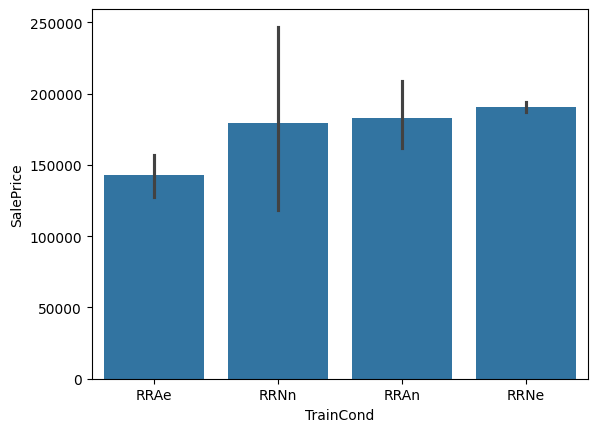

In [24]:
sns.barplot(data=near_train, x="TrainCond", y="SalePrice")

## Basement Check

In [25]:
basement_df = df[basement_features]

In [26]:
print(basement_df.info())

# Missing values
print("\nMissing values:")
print(basement_df.isnull().sum())
print(f"\nMissing % of total:")
print((basement_df.isnull().sum() / len(basement_df) * 100).round(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1460 non-null   object
 1   BsmtCond      1460 non-null   object
 2   BsmtExposure  1460 non-null   object
 3   BsmtFinType1  1460 non-null   object
 4   BsmtFinType2  1460 non-null   object
 5   BsmtFinSF1    1460 non-null   int64 
 6   BsmtFinSF2    1460 non-null   int64 
 7   BsmtUnfSF     1460 non-null   int64 
 8   TotalBsmtSF   1460 non-null   int64 
 9   BsmtFullBath  1460 non-null   int64 
 10  BsmtHalfBath  1460 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 125.6+ KB
None

Missing values:
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

Missing % of total:
BsmtQual        0.0
BsmtCond        0.0
B

In [27]:
basement_df = df[basement_features].copy()

basement_df["HasBasement"] = (basement_df["BsmtQual"].str.lower() != "no basement").astype(int)
basement_df["BsmtCond"] = basement_df["BsmtCond"].copy().str.lower().map({"no basement": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
basement_df["BsmtExposure"] = basement_df["BsmtExposure"].copy().str.lower().map({"no basement": 0, "no": 1, "mn": 2, "av": 3, "gd":4})
basement_df["BsmtFinType1"] = basement_df["BsmtFinType1"].copy().str.lower().map({"no basement": 0, "unf": 1, "lwq": 2, "rec": 3, "blq":4, "alq": 5, "glq":6})
basement_df["BsmtFinType2"] = basement_df["BsmtFinType2"].copy().str.lower().map({"no basement": 0, "unf": 1, "lwq": 2, "rec": 3, "blq":4,"alq": 5, "glq": 5})

BsmtQual
TA             44.452055
Gd             42.328767
Ex              8.287671
No Basement     2.534247
Fa              2.397260
Name: proportion, dtype: float64


<Axes: xlabel='BsmtQual', ylabel='SalePrice'>

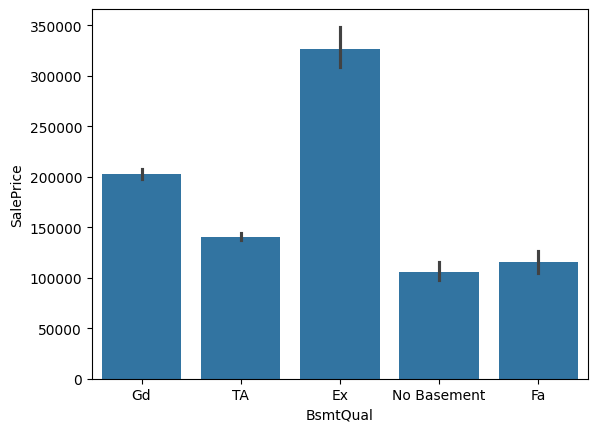

In [28]:
print(df["BsmtQual"].value_counts(normalize=True).sort_values(ascending=False) * 100)
sns.barplot( x=df["BsmtQual"], y=df["SalePrice"])

In [29]:


bsmt_height_map = {
    "ex": 100,
    "gd": 95,
    "ta": 85,
    "fa": 75,
    "po": 65,
    "no basement": 55
}

basement_df["BsmtHeight"] = df["BsmtQual"].str.lower().map(bsmt_height_map)


In [30]:
basement_df.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,HasBasement,BsmtHeight
0,Gd,3,1,6,1,706,0,150,856,1,0,1,95
1,Gd,3,4,5,1,978,0,284,1262,0,1,1,95
2,Gd,3,2,6,1,486,0,434,920,1,0,1,95
3,TA,4,1,5,1,216,0,540,756,1,0,1,85
4,Gd,3,3,6,1,655,0,490,1145,1,0,1,95


In [31]:

basement_df = basement_df.drop(["BsmtQual"], axis=1)

## Exterior 

In [32]:

exterior_df = df[exterior_features].copy()

In [33]:
exterior_df.columns

Index(['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'RoofStyle',
       'RoofMatl', 'ExterCond', 'ExterQual'],
      dtype='object')

In [34]:
# Get all object / categorical columns
cat_features = exterior_df.select_dtypes(include=['object', 'category']).columns
for col in cat_features:
    print(f"\nFeature: {col}")
    print(exterior_df[col].value_counts(normalize=True).sort_values(ascending=False) * 100)



Feature: Exterior1st
Exterior1st
VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
BrkComm     0.136986
Stone       0.136986
AsphShn     0.068493
ImStucc     0.068493
CBlock      0.068493
Name: proportion, dtype: float64

Feature: Exterior2nd
Exterior2nd
VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
Other       0.068493
CBlock      0.068493
Name: proportion, dtype: float64

Feature: MasVnrType
MasVnrType
None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: proportion, dtype: float64

Feature: RoofStyle
RoofStyle
Gable      78.150685
Hip        19.5

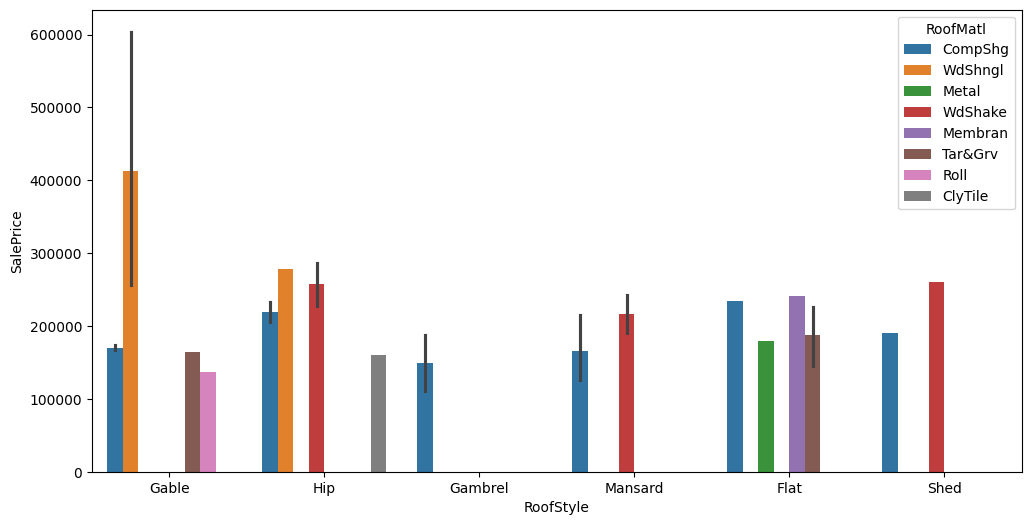

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=exterior_df, x="RoofStyle", y=df["SalePrice"], hue="RoofMatl")
plt.show()

In [36]:


exterior_df["RoofMatStyleConcat"] = exterior_df["RoofMatl"] + " " + exterior_df["RoofStyle"]
exterior_df['YearBuilt_decade'] = (df['YearBuilt'] // 10) * 10

print(exterior_df["RoofMatStyleConcat"].value_counts(normalize=True).sort_values(ascending=False) * 100)

RoofMatStyleConcat
CompShg Gable      77.671233
CompShg Hip        19.315068
CompShg Gambrel     0.753425
Tar&Grv Flat        0.684932
WdShngl Gable       0.342466
CompShg Mansard     0.342466
WdShake Hip         0.136986
WdShake Mansard     0.136986
Membran Flat        0.068493
Metal Flat          0.068493
CompShg Flat        0.068493
Tar&Grv Gable       0.068493
WdShngl Hip         0.068493
CompShg Shed        0.068493
WdShake Shed        0.068493
Roll Gable          0.068493
ClyTile Hip         0.068493
Name: proportion, dtype: float64


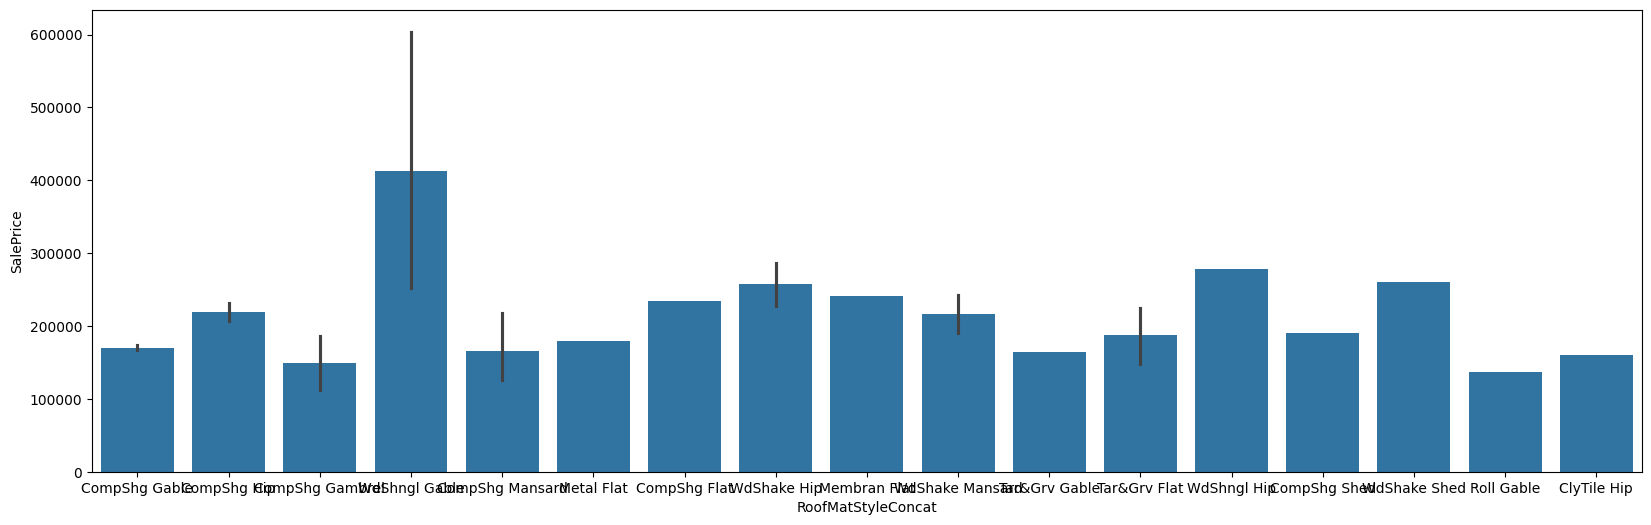

In [37]:
plt.figure(figsize=(20, 6))
sns.barplot(data=exterior_df, x="RoofMatStyleConcat", y=df["SalePrice"])
plt.show()

In [38]:


exterior_df["isRareRoof"] = (exterior_df["RoofMatl"] != "CompShg").astype(int)

In [39]:


exterior_df["ExterQual"] = df["ExterQual"].str.lower().map({"po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
exterior_df["ExterCond"] = df["ExterCond"].str.lower().map({"po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
exterior_df["HasVeeneer"] = (df["MasVnrArea"] > 0).astype(int)

In [40]:
exterior_df["MasVnrArea"].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [41]:


bins = [-1, 0, 200, 500, 1000, float('inf')]
labels = ['0', '1-200', '200-500', '500-1000', '1000+']

df['MasVnrArea_binned'] = pd.cut(df['MasVnrArea'],
                                  bins=bins,
                                  labels=labels,
                                  right=False)  # right=False makes intervals [left, right)

bin_ordinal_map = {0: 0, '1-200': 1, '200-500': 2, '500-1000': 3, '1000+': 4}
exterior_df['MasVnrArea'] = df['MasVnrArea_binned'].map(bin_ordinal_map)

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

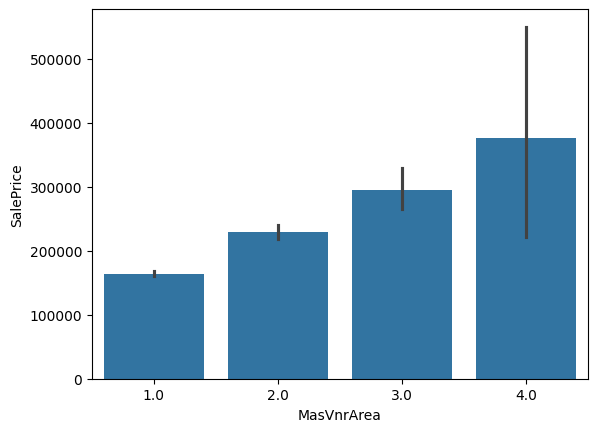

In [42]:
sns.barplot(data=exterior_df, x="MasVnrArea", y=df["SalePrice"])

In [43]:
exterior_df["ExterOverall"] = exterior_df["ExterQual"] * exterior_df["ExterCond"]

In [44]:
exterior_df.groupby("Exterior1st")["ExterQual"].mean().sort_values(ascending=False)

Exterior1st
ImStucc    4.000000
CemntBd    3.852459
VinylSd    3.718447
Stone      3.500000
Stucco     3.280000
BrkFace    3.240000
WdShing    3.230769
MetalSd    3.218182
HdBoard    3.198198
Plywood    3.129630
Wd Sdng    3.121359
AsphShn    3.000000
BrkComm    3.000000
AsbShng    2.950000
CBlock     2.000000
Name: ExterQual, dtype: float64

In [45]:
df.groupby("Exterior1st")["YearBuilt"].agg(
    mean_year="mean",
    count="count"
).sort_values("mean_year", ascending=False)


,mean_year,count
Exterior1st,,
ImStucc,1994.000000,1
VinylSd,1992.483495,515
CemntBd,1986.311475,61
Plywood,1973.787037,108
HdBoard,1973.567568,222
Stone,1966.000000,2
AsphShn,1965.000000,1
MetalSd,1956.240909,220
BrkFace,1955.640000,50


In [46]:


# 1. Define durability map (domain judgment)
durability_map = {
    'Stone': 1.0,      # Most durable, permanent
    'BrkFace': 0.9,    # Brick veneer, very durable
    'BrkComm': 0.9,    # Common brick, very durable
    'CBlock': 0.85,    # Concrete block, very durable
    'CemntBd': 0.8,    # Cement board, durable
    'Stucco': 0.75,    # Durable if maintained
    'ImStucc': 0.7,    # Imitation stucco, less durable
    'MetalSd': 0.65,   # Metal siding, durable but dents
    'VinylSd': 0.6,    # Vinyl siding, moderate durability
    'HdBoard': 0.55,   # Hardboard, moderate
    'Plywood': 0.5,    # Plywood siding, moderate
    'Wd Sdng': 0.45,   # Wood siding, requires maintenance
    'WdShing': 0.4,    # Wood shingles, higher maintenance
    'AsbShng': 0.3,    # Asbestos shingles (hazardous, brittle)
    'AsphShn': 0.2     # Asphalt shingles (roof material, degrades)
}

# 2. Create the key feature
exterior_df['exterior_1_age_score'] = (df["YrSold"] - df['YearBuilt']) / df['Exterior1st'].map(durability_map)
exterior_df['exterior_2_age_score'] = (df["YrSold"] - df['YearBuilt']) / df['Exterior2nd'].map(durability_map)

# 3. Use it. This one engineered feature may capture more signal than all three original columns combined.

<Axes: xlabel='exterior_1_age_score', ylabel='SalePrice'>

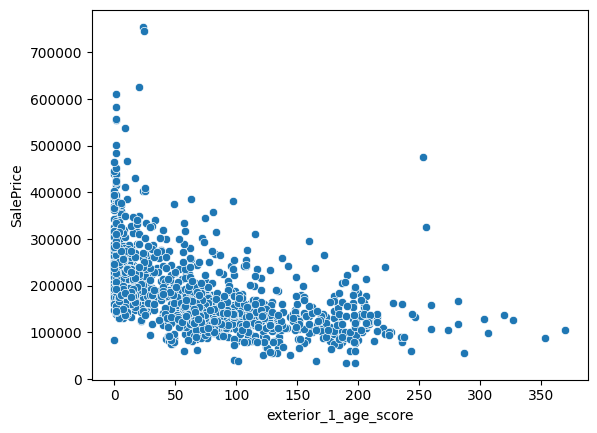

In [47]:
sns.scatterplot(data=exterior_df, x="exterior_1_age_score", y=df["SalePrice"])

In [48]:
exterior_df.head()

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,RoofStyle,RoofMatl,ExterCond,ExterQual,RoofMatStyleConcat,YearBuilt_decade,isRareRoof,HasVeeneer,ExterOverall,exterior_1_age_score,exterior_2_age_score
0,VinylSd,VinylSd,BrkFace,1.0,Gable,CompShg,3,4,CompShg Gable,2000,0,1,12,8.333333,8.333333
1,MetalSd,MetalSd,None,1.0,Gable,CompShg,3,3,CompShg Gable,1970,0,0,9,47.692308,47.692308
2,VinylSd,VinylSd,BrkFace,1.0,Gable,CompShg,3,4,CompShg Gable,2000,0,1,12,11.666667,11.666667
3,Wd Sdng,Wd Shng,None,1.0,Gable,CompShg,3,3,CompShg Gable,1910,0,0,9,202.222222,NaN
4,VinylSd,VinylSd,BrkFace,2.0,Gable,CompShg,3,4,CompShg Gable,2000,0,1,12,13.333333,13.333333


In [49]:
exterior_df = exterior_df.drop(["Exterior1st", "Exterior2nd", "MasVnrType", "RoofStyle", "RoofMatl", "RoofMatStyleConcat", "YearBuilt_decade"],axis=1)
exterior_df[["exterior_1_age_score", "exterior_2_age_score"]] = exterior_df[["exterior_1_age_score", "exterior_2_age_score"]].fillna(0)

## Garage

In [50]:

garage_df = df[garage_features].copy()

In [51]:
garage_df.columns

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [52]:
# Get all object / categorical columns
cat_features = garage_df.select_dtypes(include=['object', 'category']).columns
for col in cat_features:
    print(f"\nFeature: {col}")
    print(garage_df[col].value_counts(normalize=True).sort_values(ascending=False) * 100)


Feature: GarageType
GarageType
Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: proportion, dtype: float64

Feature: GarageFinish
GarageFinish
Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: proportion, dtype: float64

Feature: GarageQual
GarageQual
TA           89.794521
No Garage     5.547945
Fa            3.287671
Gd            0.958904
Ex            0.205479
Po            0.205479
Name: proportion, dtype: float64

Feature: GarageCond
GarageCond
TA           90.821918
No Garage     5.547945
Fa            2.397260
Gd            0.616438
Po            0.479452
Ex            0.136986
Name: proportion, dtype: float64


In [53]:
garage_df["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', 'No Garage'], dtype=object)

In [54]:




garage_df["HasGarage"] = (df["GarageType"].str.lower() != "no garage").astype(int)
garage_df["GarageQual"] = garage_df["GarageQual"].str.lower().map({"no garage": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
garage_df["GarageCond"] = garage_df["GarageCond"].str.lower().map({"no garage": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})

In [55]:


garage_df["is_detatched_garage"] = (garage_df["GarageType"] == "Detchd").astype(int)
garage_df["is_builtin_garage"] = (garage_df["GarageType"] == "BuiltIn").astype(int)
garage_df['is_carport_or_basement_garage'] = (garage_df['GarageType'].isin(['CarPort', 'Basment'])).astype(int)

garage_df["quality_cond_gap"] = garage_df["GarageQual"] - garage_df["GarageCond"]

<Axes: xlabel='GarageType', ylabel='SalePrice'>

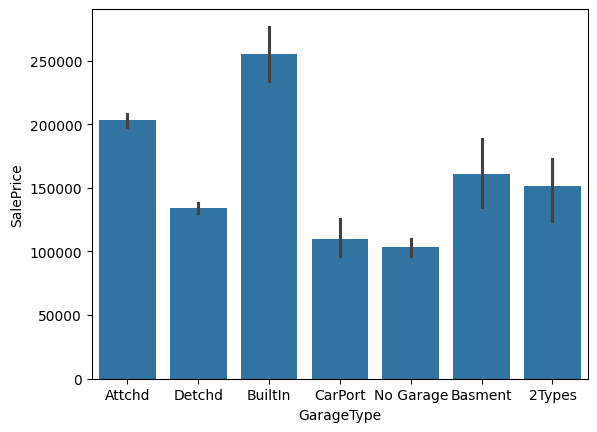

In [56]:
sns.barplot(data=garage_df, x= "GarageType", y=df["SalePrice"])

In [57]:
garage_df.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,HasGarage,is_detatched_garage,is_builtin_garage,is_carport_or_basement_garage,quality_cond_gap
0,Attchd,2003.0,RFn,2,548,3,3,1,0,0,0,0
1,Attchd,1976.0,RFn,2,460,3,3,1,0,0,0,0
2,Attchd,2001.0,RFn,2,608,3,3,1,0,0,0,0
3,Detchd,1998.0,Unf,3,642,3,3,1,1,0,0,0
4,Attchd,2000.0,RFn,3,836,3,3,1,0,0,0,0


In [58]:


garage_df["GarageFinish"] = df["GarageFinish"].map({'RFn': 2, 'Unf': 1, 'Fin': 3, 'No Garage': 0})
garage_df = garage_df.drop(["GarageType", "GarageYrBlt"], axis=1)

In [59]:
garage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   GarageFinish                   1460 non-null   int64
 1   GarageCars                     1460 non-null   int64
 2   GarageArea                     1460 non-null   int64
 3   GarageQual                     1460 non-null   int64
 4   GarageCond                     1460 non-null   int64
 5   HasGarage                      1460 non-null   int32
 6   is_detatched_garage            1460 non-null   int32
 7   is_builtin_garage              1460 non-null   int32
 8   is_carport_or_basement_garage  1460 non-null   int32
 9   quality_cond_gap               1460 non-null   int64
dtypes: int32(4), int64(6)
memory usage: 91.4 KB


## Interior

In [60]:

interior_df = df[interior_features].copy()

In [61]:
interior_df.columns

Index(['KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', 'FullBath', 'HalfBath',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [62]:
interior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   KitchenAbvGr  1460 non-null   int64 
 1   KitchenQual   1460 non-null   object
 2   Fireplaces    1460 non-null   int64 
 3   FireplaceQu   1460 non-null   object
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   Functional    1460 non-null   object
 7   FullBath      1460 non-null   int64 
 8   HalfBath      1460 non-null   int64 
 9   BsmtFullBath  1460 non-null   int64 
 10  BsmtHalfBath  1460 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 125.6+ KB


In [63]:
# Get all object / categorical columns
cat_features = interior_df.select_dtypes(include=['object', 'category']).columns
for col in cat_features:
    print(f"\nFeature: {col}")
    print(interior_df[col].value_counts(normalize=True).sort_values(ascending=False) * 100)



Feature: KitchenQual
KitchenQual
TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: proportion, dtype: float64

Feature: FireplaceQu
FireplaceQu
No Fireplace    47.260274
Gd              26.027397
TA              21.438356
Fa               2.260274
Ex               1.643836
Po               1.369863
Name: proportion, dtype: float64

Feature: Functional
Functional
Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: proportion, dtype: float64


<Axes: xlabel='Functional', ylabel='SalePrice'>

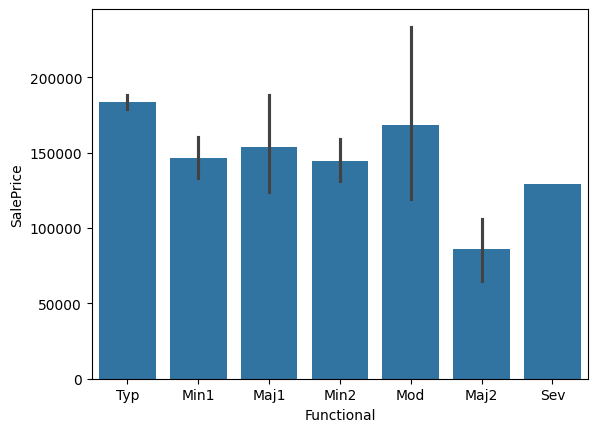

In [64]:
sns.barplot(data=interior_df, x= "Functional", y=df["SalePrice"])

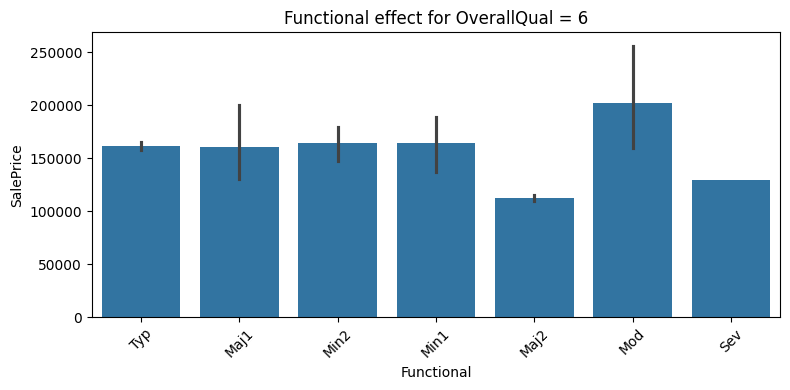

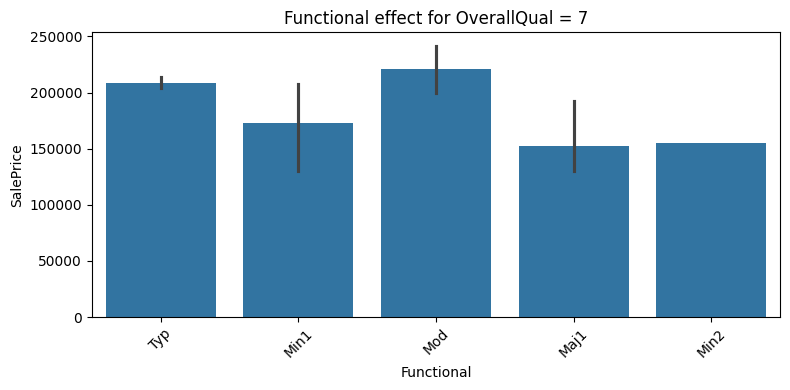

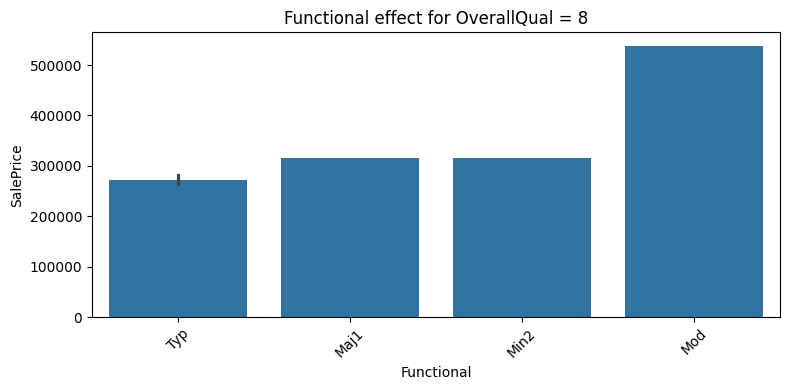

In [65]:
for qual in [6, 7, 8]:  
    subset = df[df['OverallQual'] == qual]
    if len(subset) > 20:
        plt.figure(figsize=(8,4))
        sns.barplot(data=subset, x='Functional', y='SalePrice')
        plt.title(f'Functional effect for OverallQual = {qual}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [66]:
interior_df = df[interior_features].copy()pd.crosstab(df['Functional'], df['OverallQual'], normalize='columns')

OverallQual,1,2,3,4,5,6,7,8,9,10
Functional,,,,,,,,,,
Maj1,0.5,0.333333,0.00,0.000000,0.010076,0.008021,0.012539,0.005952,0.0,0.0
Maj2,0.0,0.000000,0.05,0.000000,0.005038,0.005348,0.000000,0.000000,0.0,0.0
Min1,0.0,0.000000,0.05,0.017241,0.047859,0.016043,0.009404,0.000000,0.0,0.0
Min2,0.0,0.000000,0.05,0.068966,0.047859,0.010695,0.003135,0.005952,0.0,0.0
Mod,0.0,0.000000,0.05,0.017241,0.015113,0.008021,0.006270,0.005952,0.0,0.0
Sev,0.0,0.000000,0.00,0.000000,0.000000,0.002674,0.000000,0.000000,0.0,0.0
Typ,0.5,0.666667,0.80,0.896552,0.874055,0.949198,0.968652,0.982143,1.0,1.0


In [67]:

#Very hard to see any real pattern as 'Typical' dominates the feature so, I will just flag non-typical functionality
interior_df['has_functional_issues'] = (interior_df['Functional'] != 'Typ').astype(int)

In [68]:


interior_df['KitchenQual'] = interior_df['KitchenQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
interior_df["NumOfFirePlace"] = (interior_df["Fireplaces"] > 0).astype(int)
interior_df['FireplaceQu'] = interior_df['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Fireplace': 0})

In [69]:
print(interior_df.columns.tolist())
print(f"Duplicate columns: {interior_df.columns[interior_df.columns.duplicated()].tolist()}")

['KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'has_functional_issues', 'NumOfFirePlace']
Duplicate columns: []


In [70]:


interior_df['bedroom_ratio'] = interior_df['BedroomAbvGr'] / (interior_df['TotRmsAbvGrd'] + 1)
interior_df['bedroom-bathroom_ratio'] = (interior_df['FullBath'] + interior_df["HalfBath"]) / (df['BedroomAbvGr']).replace(0,1)
# Total full & half baths
interior_df['TotalFullBath'] = interior_df['FullBath'] + interior_df['BsmtFullBath']
interior_df['TotalHalfBath'] = interior_df['HalfBath'] + interior_df['BsmtHalfBath']

In [71]:
interior_df.head()

,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,BedroomAbvGr,TotRmsAbvGrd,Functional,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,has_functional_issues,NumOfFirePlace,bedroom_ratio,bedroom-bathroom_ratio,TotalFullBath,TotalHalfBath
0,1,3,0,0,3,8,Typ,2,1,1,0,0,0,0.333333,1.000000,3,1
1,1,2,1,3,3,6,Typ,2,0,0,1,0,1,0.428571,0.666667,2,1
2,1,3,1,3,3,6,Typ,2,1,1,0,0,1,0.428571,1.000000,3,1
3,1,3,1,4,3,7,Typ,1,0,1,0,0,1,0.375000,0.333333,2,0
4,1,3,1,3,4,9,Typ,2,1,1,0,0,1,0.400000,0.750000,3,1


In [72]:


interior_df = interior_df.drop(["Functional"], axis=1)

In [73]:
interior_df.columns

Index(['KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'BsmtFullBath',
       'BsmtHalfBath', 'has_functional_issues', 'NumOfFirePlace',
       'bedroom_ratio', 'bedroom-bathroom_ratio', 'TotalFullBath',
       'TotalHalfBath'],
      dtype='object')

# Structural

In [74]:


structure_df = df[structure_features].copy()

In [75]:
structure_df.columns

Index(['MSSubClass', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Foundation'],
      dtype='object')

In [76]:


ms_subclass_map = {
    20: '1-STORY 1946 & NEWER',
    30: '1-STORY 1945 & OLDER', 
    40: '1-STORY W/FINISHED ATTIC',
    45: '1-1/2 STORY UNFINISHED',
    50: '1-1/2 STORY FINISHED',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX',
    120: '1-STORY PUD',
    150: '1-1/2 STORY PUD',
    160: '2-STORY PUD',
    180: 'PUD MULTILEVEL',
    190: '2 FAMILY CONVERSION'
}

structure_df['MSSubClass_Text'] = structure_df['MSSubClass'].map(ms_subclass_map)

In [77]:
# Get all object / categorical columns
cat_features = structure_df.select_dtypes(include=['object', 'category']).columns
for col in cat_features:
    print(f"\nFeature: {col}")
    print(structure_df[col].value_counts(normalize=True).sort_values(ascending=False) * 100)



Feature: BldgType
BldgType
1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: proportion, dtype: float64

Feature: HouseStyle
HouseStyle
1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: proportion, dtype: float64

Feature: Foundation
Foundation
PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: proportion, dtype: float64

Feature: MSSubClass_Text
MSSubClass_Text
1-STORY 1946 & NEWER        36.712329
2-STORY 1946 & NEWER        20.479452
1-1/2 STORY FINISHED         9.863014
1-STORY PUD                  5.958904
1-STORY 1945 & OLDER         4.726027
2-STORY PUD                  4.315068
2-STORY 1945 & OLDER         4.109589
SPLIT OR MULTI-LEVEL         3.972603
DUPLEX                       3.561644
2 FAMILY CONVERSION          2.054795
SPLIT F

In [78]:
structure_df["has_storage_story"] = structure_df["MSSubClass"].isin([40,45,50,75,150]).astype(int)


<Axes: xlabel='Foundation', ylabel='SalePrice'>

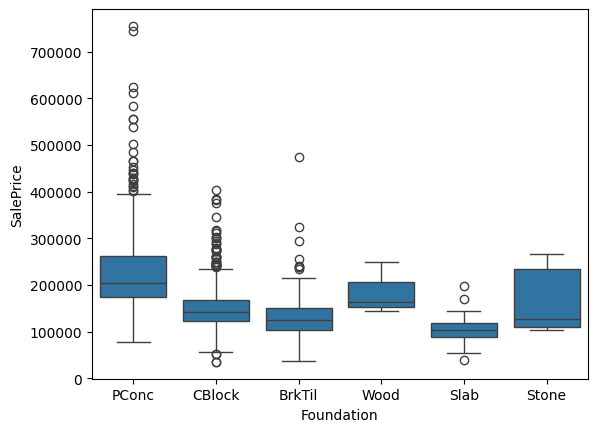

In [79]:
sns.boxplot(data=structure_df, x="Foundation", y=df["SalePrice"])

In [80]:


structure_df['is_PConc'] = (structure_df['Foundation'] == 'PConc').astype(int)
structure_df['is_CBlock'] = (structure_df['Foundation'] == 'CBlock').astype(int)
structure_df['is_OtherFoundation'] = (~structure_df['Foundation'].isin(['PConc', 'CBlock'])).astype(int)

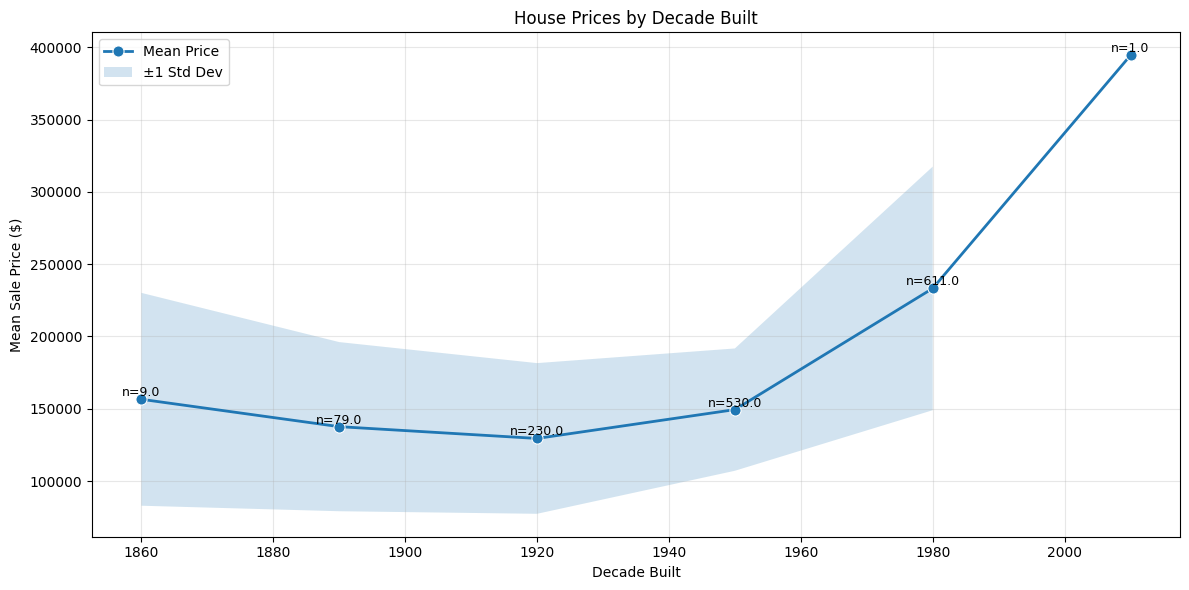

In [81]:
df['DecadeBuilt'] = (df['YearBuilt'] // 30) * 30

decade_prices = df.groupby('DecadeBuilt')['SalePrice'].agg(['mean', 'std', 'count']).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_prices, x='DecadeBuilt', y='mean', 
             marker='o', linewidth=2, markersize=8, label='Mean Price')

plt.fill_between(decade_prices['DecadeBuilt'], 
                 decade_prices['mean'] - decade_prices['std'],
                 decade_prices['mean'] + decade_prices['std'],
                 alpha=0.2, label='±1 Std Dev')

for i, row in decade_prices.iterrows():
    plt.text(row['DecadeBuilt'], row['mean'], f"n={row['count']}", 
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Decade Built')
plt.ylabel('Mean Sale Price ($)')
plt.title('House Prices by Decade Built')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

In [82]:
structure_df["remodelAge"] = df["YrSold"] - df["YearRemodAdd"]

structure_df["newly_remodelled"] = ((df["YrSold"] - df["YearRemodAdd"]) <= 5).astype(int)

<Axes: xlabel='remodelAge', ylabel='SalePrice'>

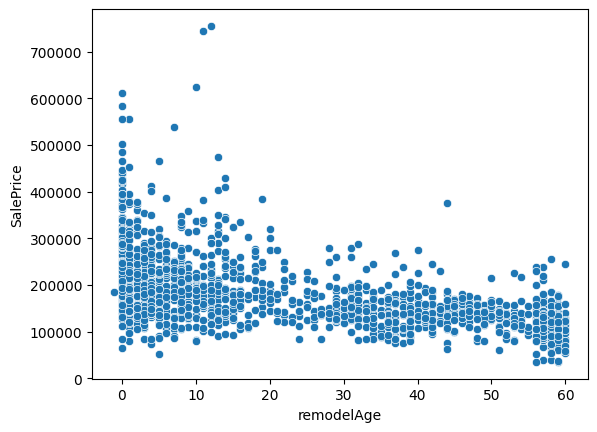

In [83]:
sns.scatterplot(x=((structure_df["remodelAge"]).astype(int)), y=df["SalePrice"])

<Axes: xlabel='newly_remodelled', ylabel='SalePrice'>

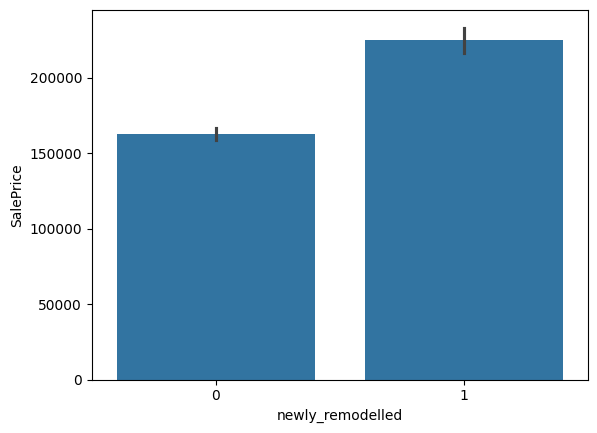

In [84]:
sns.barplot(x=structure_df["newly_remodelled"], y=df["SalePrice"])

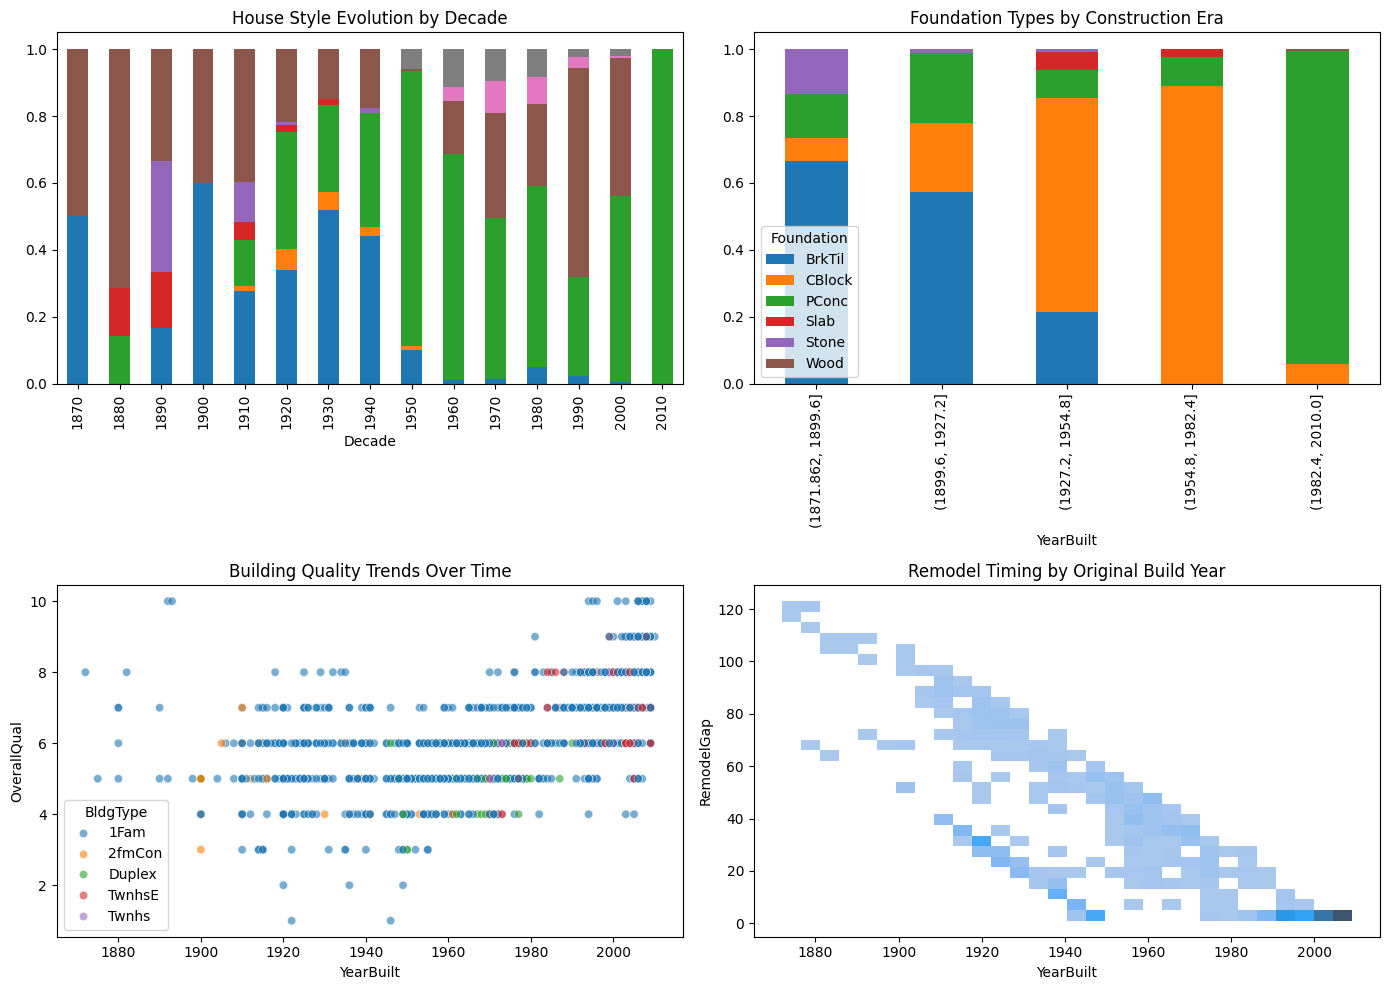

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df['Decade'] = (df['YearBuilt'] // 10) * 10
style_by_decade = pd.crosstab(df['Decade'], df['HouseStyle'], normalize='index')
style_by_decade.plot(kind='bar', stacked=True, ax=axes[0,0], legend=False)
axes[0,0].set_title('House Style Evolution by Decade')

foundation_by_era = pd.crosstab(pd.cut(df['YearBuilt'], bins=5), df['Foundation'], normalize='index')
foundation_by_era.plot(kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Foundation Types by Construction Era')

sns.scatterplot(data=df, x='YearBuilt', y='OverallQual', hue='BldgType', ax=axes[1,0], alpha=0.6)
axes[1,0].set_title('Building Quality Trends Over Time')

df['RemodelGap'] = df['YearRemodAdd'] - df['YearBuilt']
sns.histplot(data=df[df['RemodelGap']>0], x='YearBuilt', y='RemodelGap', ax=axes[1,1], bins=30)
axes[1,1].set_title('Remodel Timing by Original Build Year')

plt.tight_layout()
plt.show()

In [86]:


structure_df["HouseAge"] =  df["YrSold"]- df["YearBuilt"]

In [87]:
structure_df.head()

,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Foundation,MSSubClass_Text,has_storage_story,is_PConc,is_CBlock,is_OtherFoundation,remodelAge,newly_remodelled,HouseAge
0,60,1Fam,2Story,7,5,2003,2003,PConc,2-STORY 1946 & NEWER,0,1,0,0,5,1,5
1,20,1Fam,1Story,6,8,1976,1976,CBlock,1-STORY 1946 & NEWER,0,0,1,0,31,0,31
2,60,1Fam,2Story,7,5,2001,2002,PConc,2-STORY 1946 & NEWER,0,1,0,0,6,0,7
3,70,1Fam,2Story,7,5,1915,1970,BrkTil,2-STORY 1945 & OLDER,0,0,0,1,36,0,91
4,60,1Fam,2Story,8,5,2000,2000,PConc,2-STORY 1946 & NEWER,0,1,0,0,8,0,8


In [88]:


structure_df = structure_df.drop(["BldgType", "HouseStyle", "MSSubClass_Text", "MSSubClass", "Foundation", "YearBuilt", "YearRemodAdd", "newly_remodelled"], axis=1)

In [89]:
structure_df.columns

Index(['OverallQual', 'OverallCond', 'has_storage_story', 'is_PConc',
       'is_CBlock', 'is_OtherFoundation', 'remodelAge', 'HouseAge'],
      dtype='object')

## Utilities

In [90]:


utility_df = df[utility_features].copy()

In [91]:
utility_df.columns

Index(['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Utilities'], dtype='object')

In [92]:
cat_features = utility_df.select_dtypes(include=['object', 'category']).columns
for col in cat_features:
    print(f"\nFeature: {col}")
    print(utility_df[col].value_counts(normalize=True).sort_values(ascending=False) * 100)



Feature: Heating
Heating
GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: proportion, dtype: float64

Feature: HeatingQC
HeatingQC
Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: proportion, dtype: float64

Feature: CentralAir
CentralAir
Y    93.493151
N     6.506849
Name: proportion, dtype: float64

Feature: Electrical
Electrical
SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
None      0.068493
Name: proportion, dtype: float64

Feature: Utilities
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: proportion, dtype: float64


In [93]:
utility_df.head()

,Heating,HeatingQC,CentralAir,Electrical,Utilities
0,GasA,Ex,Y,SBrkr,AllPub
1,GasA,Ex,Y,SBrkr,AllPub
2,GasA,Ex,Y,SBrkr,AllPub
3,GasA,Gd,Y,SBrkr,AllPub
4,GasA,Ex,Y,SBrkr,AllPub


In [94]:


utility_df = utility_df.drop(["Heating", "HeatingQC", "Electrical", "CentralAir", "Electrical", "Utilities"], axis=1)

## Site Features ---

In [95]:


site_df = df[site_features].copy()

In [96]:
site_df.columns

Index(['LotFrontage', 'LotShape', 'LotConfig', 'LandContour', 'LandSlope',
       'Street', 'Alley', 'PavedDrive'],
      dtype='object')

In [97]:
site_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   LotShape     1460 non-null   object 
 2   LotConfig    1460 non-null   object 
 3   LandContour  1460 non-null   object 
 4   LandSlope    1460 non-null   object 
 5   Street       1460 non-null   object 
 6   Alley        1460 non-null   object 
 7   PavedDrive   1460 non-null   object 
dtypes: float64(1), object(7)
memory usage: 91.4+ KB


In [98]:
cat_features = site_df.select_dtypes(include=['object', 'category']).columns
for col in cat_features:
    print(f"\nFeature: {col}")
    print(site_df[col].value_counts(normalize=True).sort_values(ascending=False) * 100)



Feature: LotShape
LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: proportion, dtype: float64

Feature: LotConfig
LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: proportion, dtype: float64

Feature: LandContour
LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: proportion, dtype: float64

Feature: LandSlope
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: proportion, dtype: float64

Feature: Street
Street
Pave    99.589041
Grvl     0.410959
Name: proportion, dtype: float64

Feature: Alley
Alley
None    93.767123
Grvl     3.424658
Pave     2.808219
Name: proportion, dtype: float64

Feature: PavedDrive
PavedDrive
Y    91.780822
N     6.164384
P     2.054795
Name: proportion, dtype: float64


In [99]:


# Irregular lot (premium or problematic?)

site_df['isRegularLot'] = (df['LotShape'] == 'Reg').astype(int)
site_df['isIrregularLotType1'] = (df['LotShape'] == 'IR1').astype(int)

# Cul-de-sac premium
site_df['CulDeSac'] = (df['LotConfig'] == 'CulDSac').astype(int)

# Non-level lot (construction challenges)
site_df['SlopedLot'] = df['LandContour'].isin(['Bnk', 'HLS', 'Low']).astype(int)

# Steep slope 
site_df['SteepSlope'] = (df['LandSlope'] != 'Gtl').astype(int)

# Has alley access 
site_df['HasAlley'] = (df['Alley'] != 'None').astype(int)

# Partial or no pavement (cheap)
site_df['PoorPavement'] = (df['PavedDrive'] != 'Y').astype(int)

# Dirt road (rural/cheap)
site_df['DirtRoad'] = (df['Street'] == 'Grvl').astype(int)

In [100]:
site_df.head()

,LotFrontage,LotShape,LotConfig,LandContour,LandSlope,Street,Alley,PavedDrive,isRegularLot,isIrregularLotType1,CulDeSac,SlopedLot,SteepSlope,HasAlley,PoorPavement,DirtRoad
0,65.0,Reg,Inside,Lvl,Gtl,Pave,None,Y,1,0,0,0,0,0,0,0
1,80.0,Reg,FR2,Lvl,Gtl,Pave,None,Y,1,0,0,0,0,0,0,0
2,68.0,IR1,Inside,Lvl,Gtl,Pave,None,Y,0,1,0,0,0,0,0,0
3,60.0,IR1,Corner,Lvl,Gtl,Pave,None,Y,0,1,0,0,0,0,0,0
4,84.0,IR1,FR2,Lvl,Gtl,Pave,None,Y,0,1,0,0,0,0,0,0


In [101]:



site_df = site_df.drop(["LotShape", "LotConfig", "LandSlope","LandContour", "Street", "Alley", "PavedDrive"],axis=1)

## Dimensions ----------------

In [102]:


dimension_df = df[dimension_features].copy()

In [103]:
dimension_df.head()

,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,LowQualFinSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,8450,1710,856,856,854,548,0,706,0,150,0,61,0,0,0,0
1,9600,1262,1262,1262,0,460,0,978,0,284,298,0,0,0,0,0
2,11250,1786,920,920,866,608,0,486,0,434,0,42,0,0,0,0
3,9550,1717,756,961,756,642,0,216,0,540,0,35,272,0,0,0
4,14260,2198,1145,1145,1053,836,0,655,0,490,192,84,0,0,0,0


In [104]:
dimension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LotArea        1460 non-null   int64
 1   GrLivArea      1460 non-null   int64
 2   TotalBsmtSF    1460 non-null   int64
 3   1stFlrSF       1460 non-null   int64
 4   2ndFlrSF       1460 non-null   int64
 5   GarageArea     1460 non-null   int64
 6   LowQualFinSF   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  WoodDeckSF     1460 non-null   int64
 11  OpenPorchSF    1460 non-null   int64
 12  EnclosedPorch  1460 non-null   int64
 13  3SsnPorch      1460 non-null   int64
 14  ScreenPorch    1460 non-null   int64
 15  PoolArea       1460 non-null   int64
dtypes: int64(16)
memory usage: 182.6 KB


In [105]:


dimension_df["basement_majority_unfinished"] =(dimension_df["BsmtUnfSF"] > (dimension_df["BsmtFinSF1"] + dimension_df["BsmtFinSF2"]) ).astype(int)

In [106]:
dimension_df["basement_majority_unfinished"].value_counts()

basement_majority_unfinished
0    784
1    676
Name: count, dtype: int64

In [107]:
dimension_df.head()

,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,LowQualFinSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,basement_majority_unfinished
0,8450,1710,856,856,854,548,0,706,0,150,0,61,0,0,0,0,0
1,9600,1262,1262,1262,0,460,0,978,0,284,298,0,0,0,0,0,0
2,11250,1786,920,920,866,608,0,486,0,434,0,42,0,0,0,0,0
3,9550,1717,756,961,756,642,0,216,0,540,0,35,272,0,0,0,1
4,14260,2198,1145,1145,1053,836,0,655,0,490,192,84,0,0,0,0,0


In [108]:


dimension_df = dimension_df.drop(["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "PoolArea", "3SsnPorch", "ScreenPorch", "LowQualFinSF"], axis=1)

In [109]:
final_df = pd.concat([basement_df,exterior_df, garage_df, interior_df, structure_df, site_df, dimension_df], axis=1)
final_df.head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,HasBasement,BsmtHeight,MasVnrArea,ExterCond,ExterQual,isRareRoof,HasVeeneer,ExterOverall,exterior_1_age_score,exterior_2_age_score,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,HasGarage,is_detatched_garage,is_builtin_garage,is_carport_or_basement_garage,quality_cond_gap,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,BedroomAbvGr,TotRmsAbvGrd,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,has_functional_issues,NumOfFirePlace,bedroom_ratio,bedroom-bathroom_ratio,TotalFullBath,TotalHalfBath,OverallQual,OverallCond,has_storage_story,is_PConc,is_CBlock,is_OtherFoundation,remodelAge,HouseAge,LotFrontage,isRegularLot,isIrregularLotType1,CulDeSac,SlopedLot,SteepSlope,HasAlley,PoorPavement,DirtRoad,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,basement_majority_unfinished
0,3,1,6,1,706,0,150,856,1,0,1,95,1.0,3,4,0,1,12,8.333333,8.333333,2,2,548,3,3,1,0,0,0,0,1,3,0,0,3,8,2,1,1,0,0,0,0.333333,1.000000,3,1,7,5,0,1,0,0,5,5,65.0,1,0,0,0,0,0,0,0,8450,1710,856,856,854,548,0,61,0,0
1,3,4,5,1,978,0,284,1262,0,1,1,95,1.0,3,3,0,0,9,47.692308,47.692308,2,2,460,3,3,1,0,0,0,0,1,2,1,3,3,6,2,0,0,1,0,1,0.428571,0.666667,2,1,6,8,0,0,1,0,31,31,80.0,1,0,0,0,0,0,0,0,9600,1262,1262,1262,0,460,298,0,0,0
2,3,2,6,1,486,0,434,920,1,0,1,95,1.0,3,4,0,1,12,11.666667,11.666667,2,2,608,3,3,1,0,0,0,0,1,3,1,3,3,6,2,1,1,0,0,1,0.428571,1.000000,3,1,7,5,0,1,0,0,6,7,68.0,0,1,0,0,0,0,0,0,11250,1786,920,920,866,608,0,42,0,0
3,4,1,5,1,216,0,540,756,1,0,1,85,1.0,3,3,0,0,9,202.222222,0.000000,1,3,642,3,3,1,1,0,0,0,1,3,1,4,3,7,1,0,1,0,0,1,0.375000,0.333333,2,0,7,5,0,0,0,1,36,91,60.0,0,1,0,0,0,0,0,0,9550,1717,756,961,756,642,0,35,272,1
4,3,3,6,1,655,0,490,1145,1,0,1,95,2.0,3,4,0,1,12,13.333333,13.333333,2,3,836,3,3,1,0,0,0,0,1,3,1,3,4,9,2,1,1,0,0,1,0.400000,0.750000,3,1,8,5,0,1,0,0,8,8,84.0,0,1,0,0,0,0,0,0,14260,2198,1145,1145,1053,836,192,84,0,0


In [110]:
print(final_df.columns.tolist())

['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'HasBasement', 'BsmtHeight', 'MasVnrArea', 'ExterCond', 'ExterQual', 'isRareRoof', 'HasVeeneer', 'ExterOverall', 'exterior_1_age_score', 'exterior_2_age_score', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'HasGarage', 'is_detatched_garage', 'is_builtin_garage', 'is_carport_or_basement_garage', 'quality_cond_gap', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'BedroomAbvGr', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'has_functional_issues', 'NumOfFirePlace', 'bedroom_ratio', 'bedroom-bathroom_ratio', 'TotalFullBath', 'TotalHalfBath', 'OverallQual', 'OverallCond', 'has_storage_story', 'is_PConc', 'is_CBlock', 'is_OtherFoundation', 'remodelAge', 'HouseAge', 'LotFrontage', 'isRegularLot', 'isIrregularLotType1', 'CulDeSac', 'SlopedLot', 'SteepSlope', 'HasAlley', 'PoorPaveme

In [111]:
unique_features = list(set(final_df.columns.tolist()))

In [112]:
len(unique_features)

69

In [113]:
final_df = final_df[unique_features]

In [114]:
print(final_df.columns.tolist())

['isRareRoof', 'OverallCond', 'HouseAge', 'GarageQual', 'CulDeSac', 'TotRmsAbvGrd', 'ExterQual', 'NumOfFirePlace', 'BedroomAbvGr', '2ndFlrSF', 'EnclosedPorch', 'BsmtFinSF1', 'MasVnrArea', 'TotalBsmtSF', 'TotalBsmtSF', 'basement_majority_unfinished', 'is_PConc', 'GarageArea', 'GarageArea', 'isRegularLot', 'BsmtFinType2', 'BsmtHalfBath', 'BsmtHalfBath', 'remodelAge', 'BsmtFullBath', 'BsmtFullBath', 'has_functional_issues', 'HasGarage', 'quality_cond_gap', '1stFlrSF', 'BsmtCond', 'is_carport_or_basement_garage', 'GrLivArea', 'ExterOverall', 'LotArea', 'has_storage_story', 'HalfBath', 'FullBath', 'Fireplaces', 'BsmtExposure', 'LotFrontage', 'BsmtFinSF2', 'BsmtHeight', 'HasBasement', 'is_CBlock', 'PoorPavement', 'BsmtFinType1', 'bedroom-bathroom_ratio', 'BsmtUnfSF', 'HasVeeneer', 'is_builtin_garage', 'TotalFullBath', 'OverallQual', 'DirtRoad', 'OpenPorchSF', 'exterior_2_age_score', 'SteepSlope', 'TotalHalfBath', 'WoodDeckSF', 'FireplaceQu', 'is_detatched_garage', 'ExterCond', 'bedroom_ratio

In [115]:
final_df.shape

(1460, 73)

In [116]:
columns_left = set(df.columns) - set(final_df.columns)
columns_left

{'3SsnPorch',
 'Alley',
 'BldgType',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Decade',
 'DecadeBuilt',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'Foundation',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea_binned',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RemodelGap',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'SaleType',
 'ScreenPorch',
 'Street',
 'Utilities',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [117]:
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Ensure all input data are numeric types
# First convert linear data and engineered features to float
final_df = final_df.astype(float).copy()

# Combine all features
X_full = final_df
y = df["SalePrice"].astype(float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    enable_categorical=False  
)

# Train the model
X_train_array = X_train.values.astype(float)
X_test_array = X_test.values.astype(float)

xgb_model.fit(X_train_array, y_train.values.astype(float), verbose=False)
prediction = xgb_model.predict(X_test_array)
r2 = r2_score(y_test.values.astype(float), prediction)
print(f"R_squared Score: ): {r2:.3f}")

R_squared Score: ): 0.908


## Notes:
- with just engineered_df: 83.4%
- with engineered_df & basement_df: 86.9%
- with engineered_df, basement_df, exterior_df:  87.5%
- with engineered_df, basement_df, exterior_df, garage_df: 88.1%
- with engineered_df, basement_df, exterior_df, garage_df, interior_df: 91.5%

In [118]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)

# Calculate feature importance
importances = pd.DataFrame({
    'feature': final_df.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# CHECK: How many features have meaningful importance?
print(f"Top 10 features: {importances.head(10).feature.tolist()}")
print(f"Features with <0.01 importance: {(importances['importance'] < 0.01).sum()}")

Top 10 features: ['OverallQual', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'TotalBsmtSF', 'TotalBsmtSF', 'GarageCars', 'LotArea', 'BsmtHeight']
Features with <0.01 importance: 63


In [119]:
importances.head(20)

,feature,importance
52,OverallQual,0.621909
32,GrLivArea,0.126531
9,2ndFlrSF,0.038749
11,BsmtFinSF1,0.024922
29,1stFlrSF,0.024444
13,TotalBsmtSF,0.017267
14,TotalBsmtSF,0.015548
71,GarageCars,0.012681
34,LotArea,0.012393
42,BsmtHeight,0.010098


In [120]:
df["has_deck"] = (df["WoodDeckSF"] > 0).astype(int)

In [121]:
df["has_deck"].value_counts()

has_deck
0    761
1    699
Name: count, dtype: int64

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

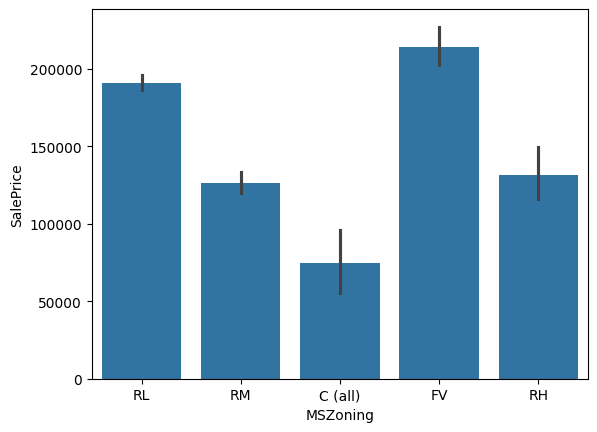

In [122]:
sns.barplot(x=df["MSZoning"], y=df["SalePrice"])

In [123]:
df["LotConfig"].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

<Axes: xlabel='LotConfig', ylabel='SalePrice'>

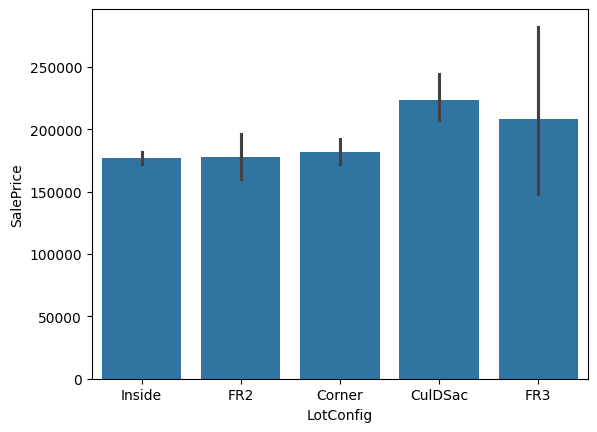

In [124]:
sns.barplot(x=df["LotConfig"], y=df["SalePrice"])

<Axes: xlabel='LotConfig', ylabel='SalePrice'>

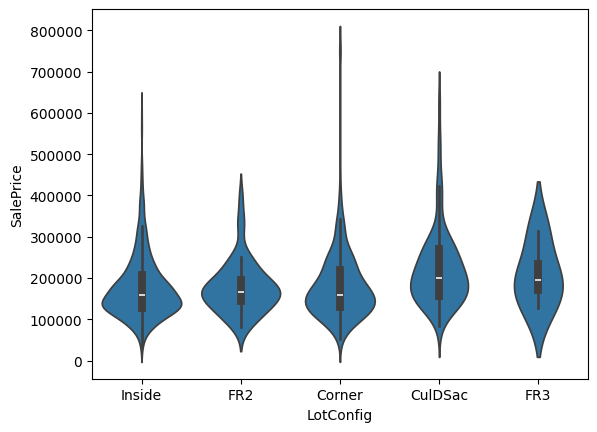

In [125]:
sns.violinplot(x=df["LotConfig"], y=df["SalePrice"])

In [126]:
FR_col = (df["LotConfig"].map({"FR2": "FR", "FR3": "FR"})).fillna(df["LotConfig"])

<Axes: xlabel='LotConfig', ylabel='SalePrice'>

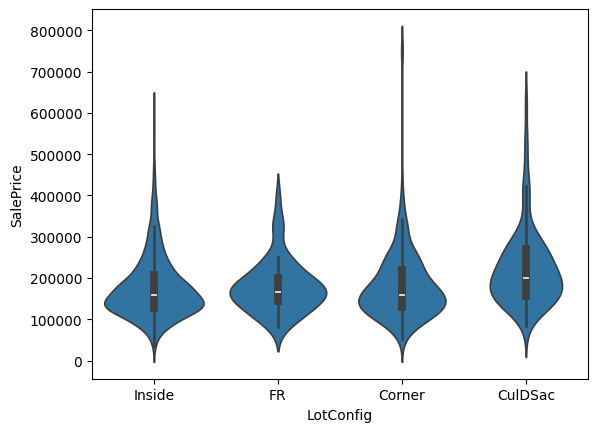

In [127]:
sns.violinplot(x=FR_col, y=df["SalePrice"])

In [128]:
foundation_stats = df.groupby('Foundation')['SalePrice'].agg([
    'count', 'mean', 'std', 'min', 'max',
    ('range', lambda x: x.max() - x.min()),
    ('cv', lambda x: x.std() / x.mean()),  
    ('iqr', lambda x: x.quantile(0.75) - x.quantile(0.25))
]).round(2).sort_values('range', ascending=False)

print("Foundation Price Statistics:")
print(foundation_stats)

# Focus on PConc vs others
print("\n=== PConc vs Other Foundations ===")
pconc_mask = df['Foundation'] == 'PConc'
other_mask = df['Foundation'] != 'PConc'

print(f"PConc houses: {pconc_mask.sum()}")
print(f"Other foundation houses: {other_mask.sum()}")

print(f"\nPConc price range: ${df[pconc_mask]['SalePrice'].min():,.0f} - ${df[pconc_mask]['SalePrice'].max():,.0f}")
print(f"Other foundations range: ${df[other_mask]['SalePrice'].min():,.0f} - ${df[other_mask]['SalePrice'].max():,.0f}")

print(f"\nPConc standard deviation: ${df[pconc_mask]['SalePrice'].std():,.0f}")
print(f"Other foundations std dev: ${df[other_mask]['SalePrice'].std():,.0f}")

Foundation Price Statistics:
            count       mean       std     min     max   range    cv  \
Foundation                                                             
PConc         647  225230.44  86865.98   78000  755000  677000  0.39   
BrkTil        146  132291.08  54592.39   37900  475000  437100  0.41   
CBlock        634  149805.71  48295.04   34900  402861  367961  0.32   
Stone           6  165959.17  78557.70  102776  266500  163724  0.47   
Slab           24  107365.62  34213.98   39300  198500  159200  0.32   
Wood            3  185666.67  56695.09  143000  250000  107000  0.31   

                  iqr  
Foundation             
PConc        89140.00  
BrkTil       48850.00  
CBlock       45875.00  
Stone       124109.25  
Slab         29509.50  
Wood         53500.00  

=== PConc vs Other Foundations ===
PConc houses: 647
Other foundation houses: 813

PConc price range: $78,000 - $755,000
Other foundations range: $34,900 - $475,000

PConc standard deviation: $86,866
O

In [129]:
cblock_foundation_w_basement = df[(df["Foundation"] == "CBlock") & (df["BsmtCond"] != "No Basement")]

In [130]:
cblock_foundation_w_basement.shape

(625, 86)

<Axes: xlabel='Foundation', ylabel='SalePrice'>

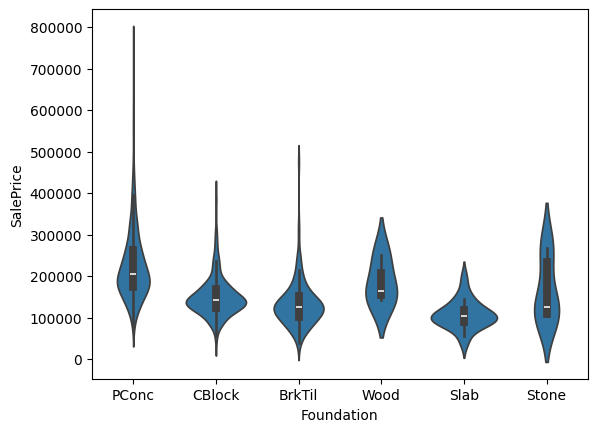

In [131]:
sns.violinplot(x=df["Foundation"], y=df["SalePrice"])

In [132]:
def compare_groups(df, group_col, value_col, group1_val, group2_val, features_to_compare):
    """Compare two groups across multiple features"""
    
    group1 = df[df[group_col] == group1_val]
    group2 = df[df[group_col] == group2_val]
    
    results = {}
    
    for feature in features_to_compare:
        if feature in df.columns:
            if df[feature].dtype != 'object':  # Numeric features
                mean1 = group1[feature].mean()
                mean2 = group2[feature].mean()
                diff_pct = ((mean1 - mean2) / mean2) * 100
                
                # Statistical test (simplified)
                from scipy import stats
                if len(group1) > 30 and len(group2) > 30:
                    t_stat, p_value = stats.ttest_ind(group1[feature].dropna(), 
                                                      group2[feature].dropna())
                else:
                    t_stat, p_value = None, None
                
                results[feature] = {
                    f'{group1_val}_mean': mean1,
                    f'{group2_val}_mean': mean2,
                    'difference_pct': diff_pct,
                    't_statistic': t_stat,
                    'p_value': p_value,
                    'significant': p_value < 0.05 if p_value else None
                }
    
    return pd.DataFrame(results).T

# Compare PConc vs Non-PConc
features_to_check = [
    'OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF',
    'YearBuilt', 'GarageCars', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'LotArea', 'LotFrontage'
]

comparison = compare_groups(df, 'Foundation', 'SalePrice', 'PConc', 'CBlock', features_to_check)
print("PConc vs CBlock comparison:")
print(comparison[['PConc_mean', 'CBlock_mean', 'difference_pct', 'significant']].round(2))



PConc vs CBlock comparison:
                PConc_mean   CBlock_mean difference_pct significant
OverallQual       6.979907      5.421136      28.753599        True
OverallCond       5.202473      5.829653     -10.758446        True
GrLivArea       1687.85626   1355.501577      24.518945        True
TotalBsmtSF    1208.697063   1001.488959      20.690004        True
YearBuilt      1993.307573   1961.253943       1.634344        True
GarageCars        2.146832      1.495268       43.57502        True
FullBath          1.850077      1.324921      39.636785        True
HalfBath          0.488408      0.329653      48.158228        True
BedroomAbvGr      2.843895      2.869085       -0.87799       False
TotRmsAbvGrd      6.868624      6.134069      11.975003        True
Fireplaces         0.68779      0.585174      17.536047        True
LotArea       10139.599691  11272.364353     -10.049042       False
LotFrontage      60.068006      55.16877       8.880453        True


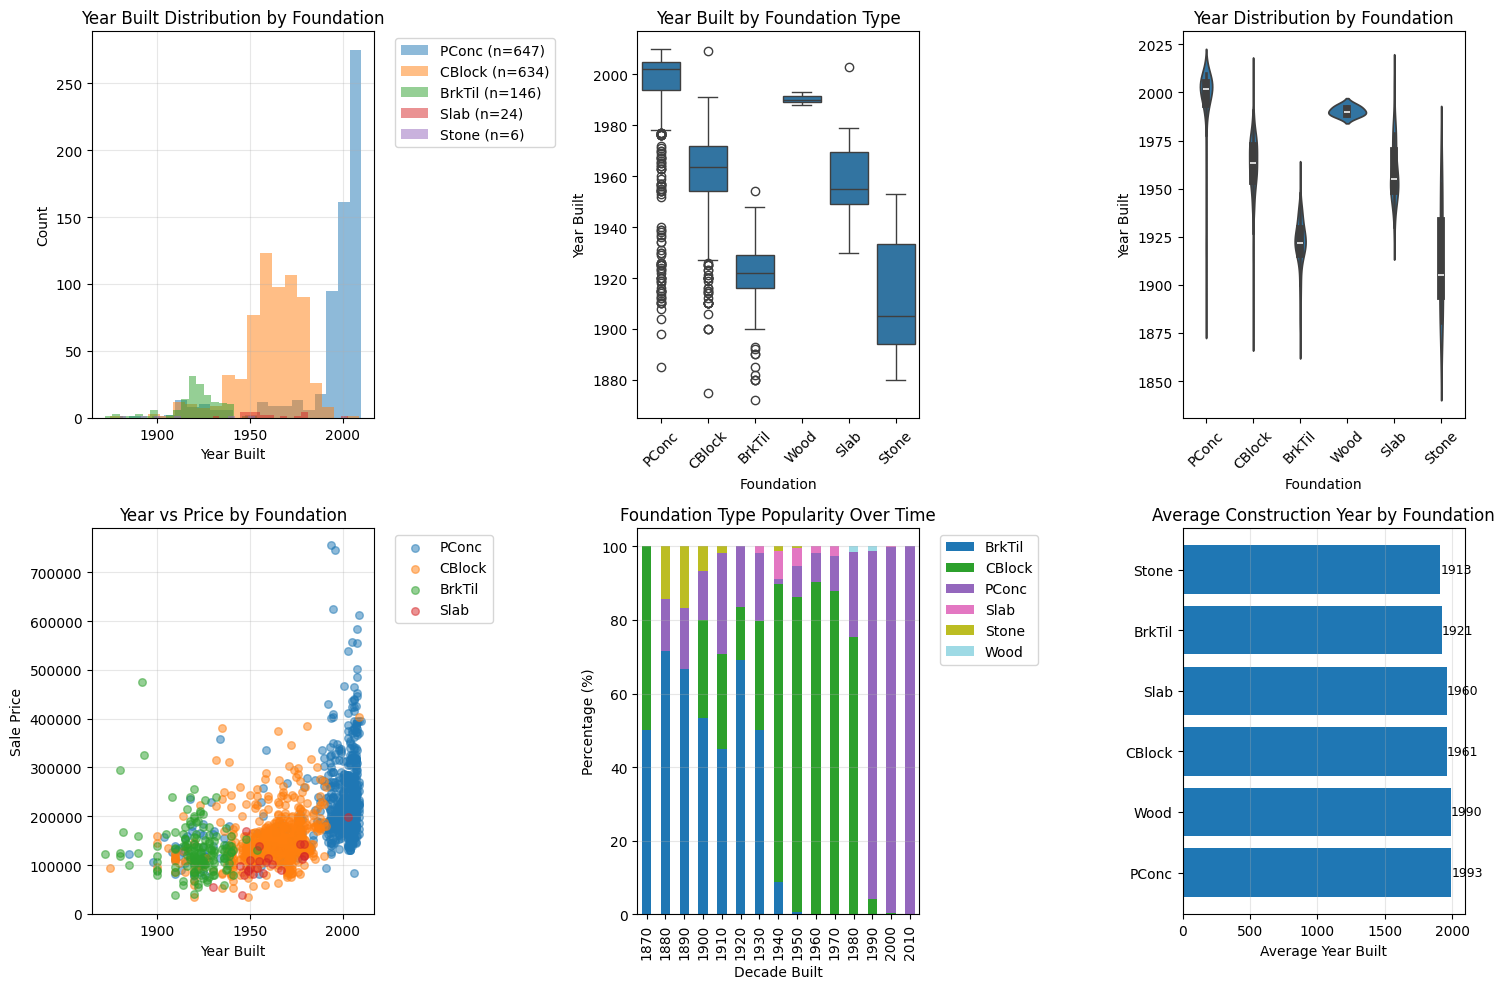

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#  Year distribution by foundation type
for foundation in df['Foundation'].unique():
    subset = df[df['Foundation'] == foundation]
    if len(subset) > 5:  # Only meaningful groups
        axes[0,0].hist(subset['YearBuilt'].dropna(), alpha=0.5, 
                      label=f'{foundation} (n={len(subset)})', bins=20)
axes[0,0].set_xlabel('Year Built')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Year Built Distribution by Foundation')
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].grid(True, alpha=0.3)

# Box plot: Year built by foundation
sns.boxplot(x='Foundation', y='YearBuilt', data=df, ax=axes[0,1])
axes[0,1].set_title('Year Built by Foundation Type')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_ylabel('Year Built')

# Violin plot: Year built by foundation
sns.violinplot(x='Foundation', y='YearBuilt', data=df, ax=axes[0,2])
axes[0,2].set_title('Year Distribution by Foundation')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].set_ylabel('Year Built')

# Scatter: Year vs Price, colored by foundation
for foundation in df['Foundation'].unique():
    subset = df[df['Foundation'] == foundation]
    if len(subset) > 10:
        axes[1,0].scatter(subset['YearBuilt'], subset['SalePrice'], 
                         alpha=0.5, label=foundation, s=30)
axes[1,0].set_xlabel('Year Built')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Year vs Price by Foundation')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].grid(True, alpha=0.3)

#  Foundation popularity over time
# Create decade bins
df['DecadeBuilt'] = (df['YearBuilt'] // 10) * 10

# Count foundation types by decade
foundation_by_decade = pd.crosstab(df['DecadeBuilt'], df['Foundation'], normalize='index') * 100

foundation_by_decade.plot(kind='bar', stacked=True, ax=axes[1,1], colormap='tab20')
axes[1,1].set_xlabel('Decade Built')
axes[1,1].set_ylabel('Percentage (%)')
axes[1,1].set_title('Foundation Type Popularity Over Time')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].grid(True, alpha=0.3, axis='y')

# Average year built by foundation
year_means = df.groupby('Foundation')['YearBuilt'].agg(['mean', 'median', 'min', 'max', 'count'])
year_means = year_means.sort_values('mean', ascending=False)

axes[1,2].barh(range(len(year_means)), year_means['mean'])
axes[1,2].set_yticks(range(len(year_means)))
axes[1,2].set_yticklabels(year_means.index)
axes[1,2].set_xlabel('Average Year Built')
axes[1,2].set_title('Average Construction Year by Foundation')
axes[1,2].grid(True, alpha=0.3, axis='x')


for i, (foundation, row) in enumerate(year_means.iterrows()):
    axes[1,2].text(row['mean'] + 0.5, i, f"{row['mean']:.0f}", 
                  va='center', fontsize=9)

plt.tight_layout()
plt.show()

YearBuilt range: 1872 to 2010
YearSold range: 2006 to 2010


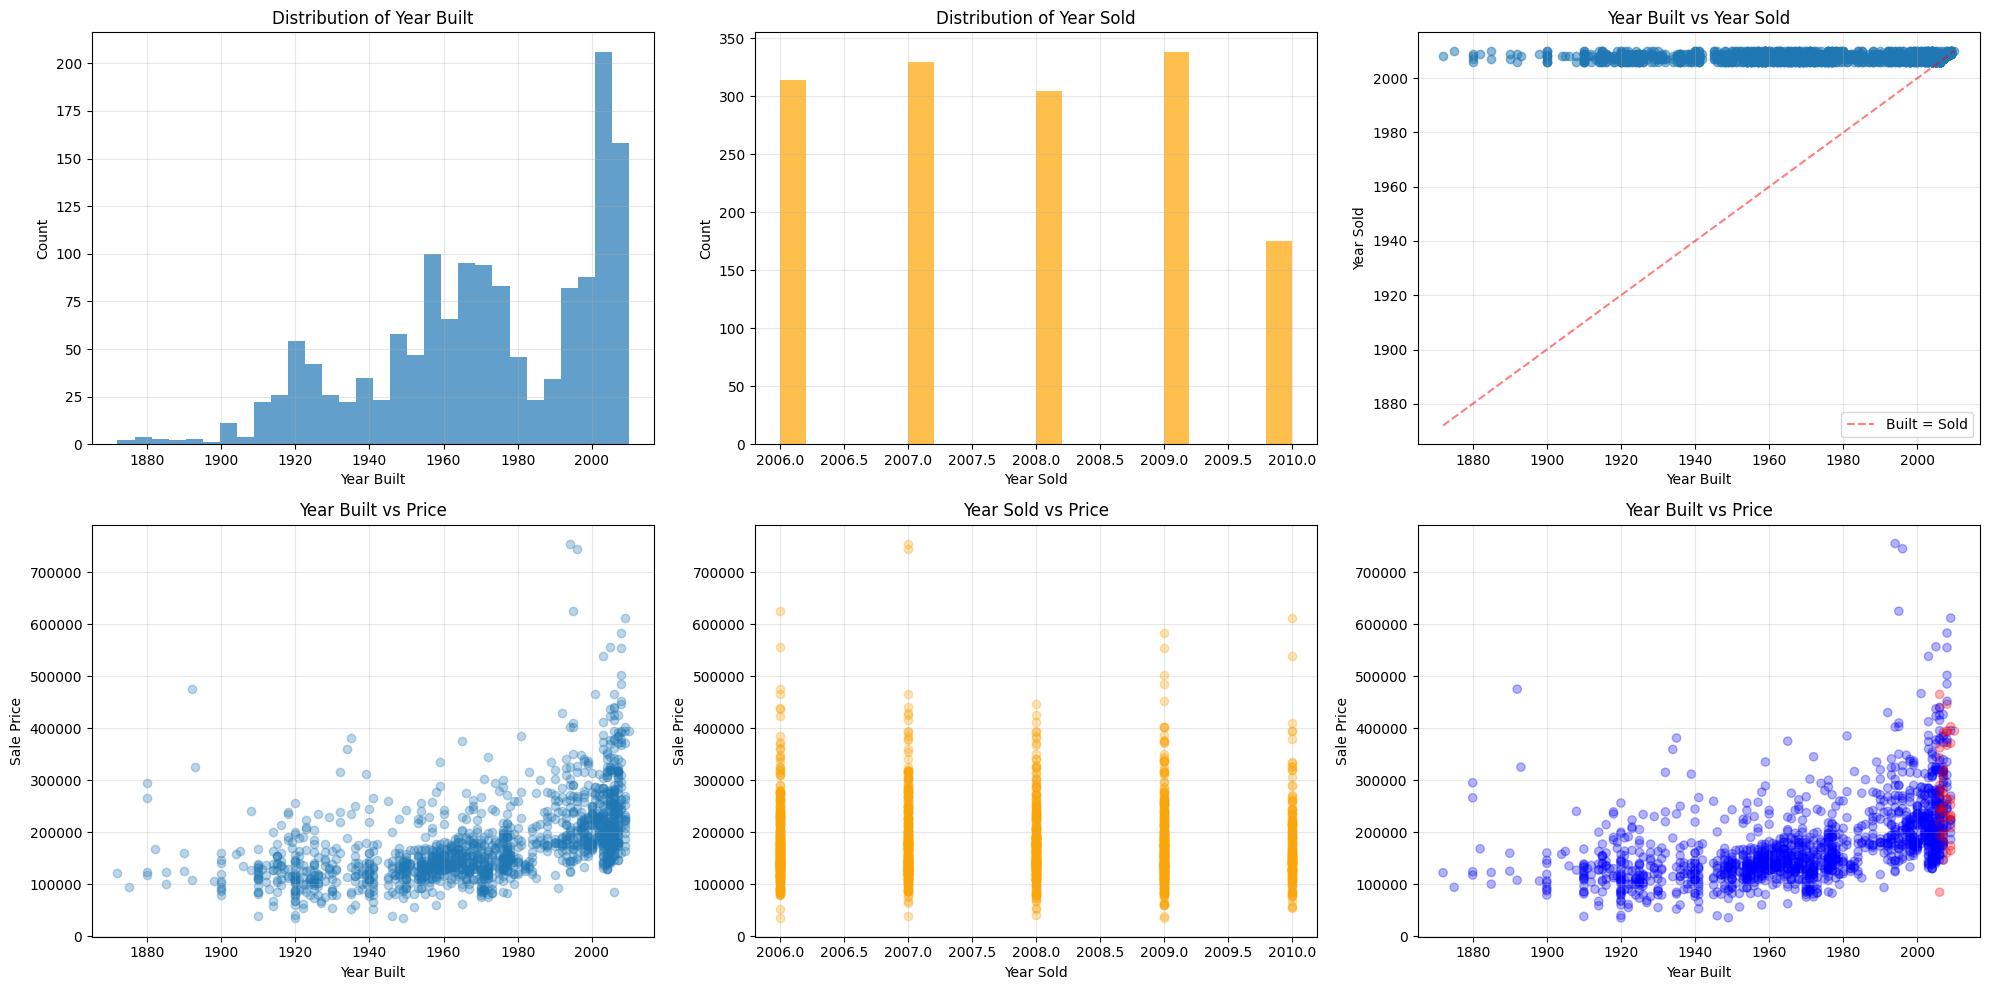

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


print(f"YearBuilt range: {df['YearBuilt'].min()} to {df['YearBuilt'].max()}")
print(f"YearSold range: {df['YrSold'].min()} to {df['YrSold'].max()}")


fig, axes = plt.subplots(2, 3, figsize=(20, 10))

#  YearBuilt distribution
axes[0,0].hist(df['YearBuilt'].dropna(), bins=30, alpha=0.7)
axes[0,0].set_xlabel('Year Built')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Distribution of Year Built')
axes[0,0].grid(True, alpha=0.3)

#  YearSold distribution
axes[0,1].hist(df['YrSold'].dropna(), bins=20, alpha=0.7, color='orange')
axes[0,1].set_xlabel('Year Sold')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Distribution of Year Sold')
axes[0,1].grid(True, alpha=0.3)

#  YearBuilt vs YearSold
scatter = axes[0,2].scatter(df['YearBuilt'], df['YrSold'], alpha=0.5)
axes[0,2].set_xlabel('Year Built')
axes[0,2].set_ylabel('Year Sold')
axes[0,2].set_title('Year Built vs Year Sold')
axes[0,2].grid(True, alpha=0.3)

# Add diagonal line (where YearSold = YearBuilt)
min_year = min(df['YearBuilt'].min(), df['YrSold'].min())
max_year = max(df['YearBuilt'].max(), df['YrSold'].max())
axes[0,2].plot([min_year, max_year], [min_year, max_year], 
              'r--', alpha=0.5, label='Built = Sold')
axes[0,2].legend()

#  YearBuilt vs Price
axes[1,0].scatter(df['YearBuilt'], df['SalePrice'], alpha=0.3)
axes[1,0].set_xlabel('Year Built')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Year Built vs Price')
axes[1,0].grid(True, alpha=0.3)

#  YearSold vs Price
axes[1,1].scatter(df['YrSold'], df['SalePrice'], alpha=0.3, color='orange')
axes[1,1].set_xlabel('Year Sold')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Year Sold vs Price')
axes[1,1].grid(True, alpha=0.3)

#  YearBuilt vs Price
df["SoldSameYear"] = (df["YearBuilt"] == df["YrSold"])

axes[1,2].scatter(df['YearBuilt'], df['SalePrice'], alpha=0.3, c=df["SoldSameYear"].map({True: 'red', False: 'blue'}))
axes[1,2].set_xlabel('Year Built')
axes[1,2].set_ylabel('Sale Price')
axes[1,2].set_title('Year Built vs Price')
axes[1,2].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

<Axes: xlabel='HeatingQC', ylabel='YearBuilt'>

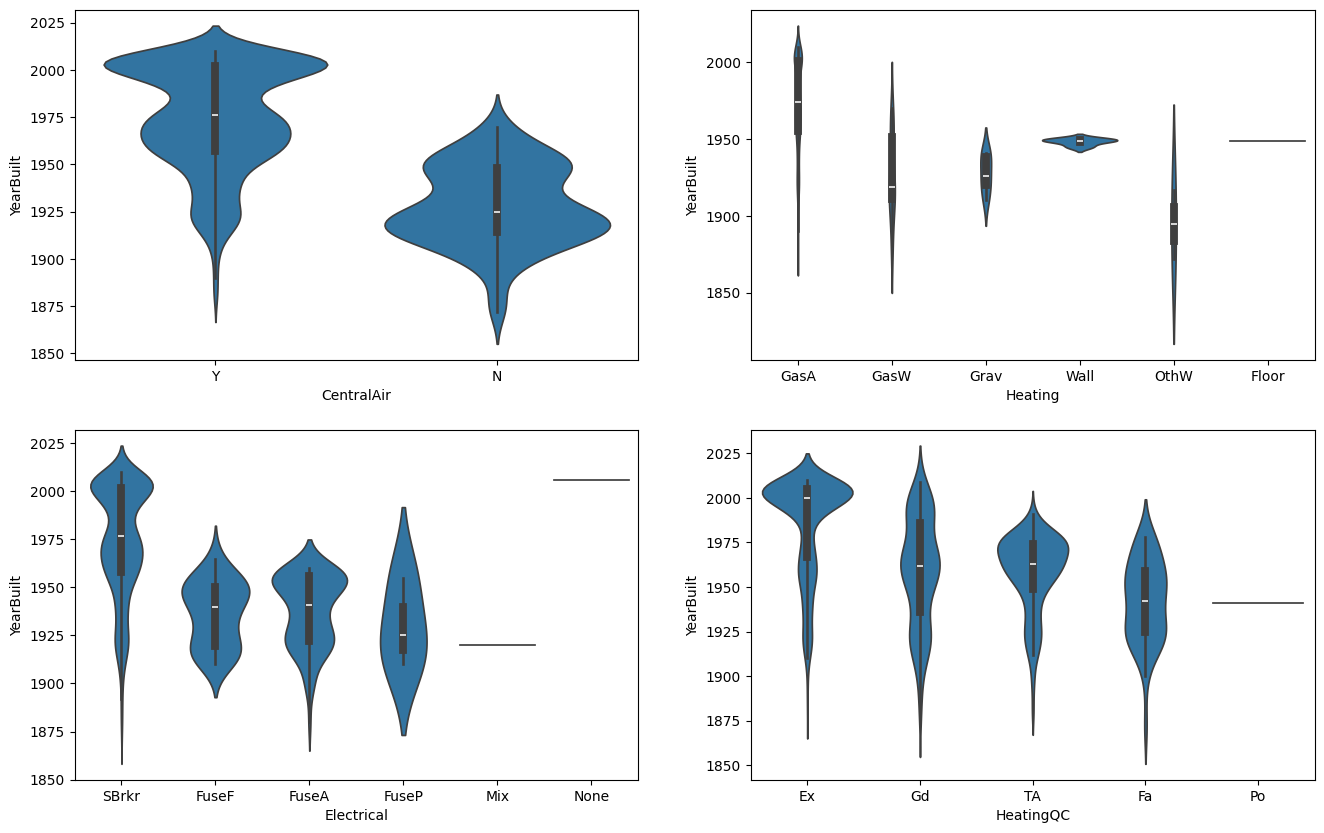

In [135]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.violinplot(data=df, x="CentralAir", y="YearBuilt", ax=axes[0,0])
sns.violinplot(data=df, x="Heating", y="YearBuilt", ax=axes[0,1])
sns.violinplot(data=df, x="Electrical", y="YearBuilt", ax=axes[1,0])
sns.violinplot(data=df, x="HeatingQC", y="YearBuilt", ax=axes[1,1])


In [136]:
df["GarageType"].value_counts()

GarageType
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: count, dtype: int64

<Axes: xlabel='GarageType', ylabel='GarageArea'>

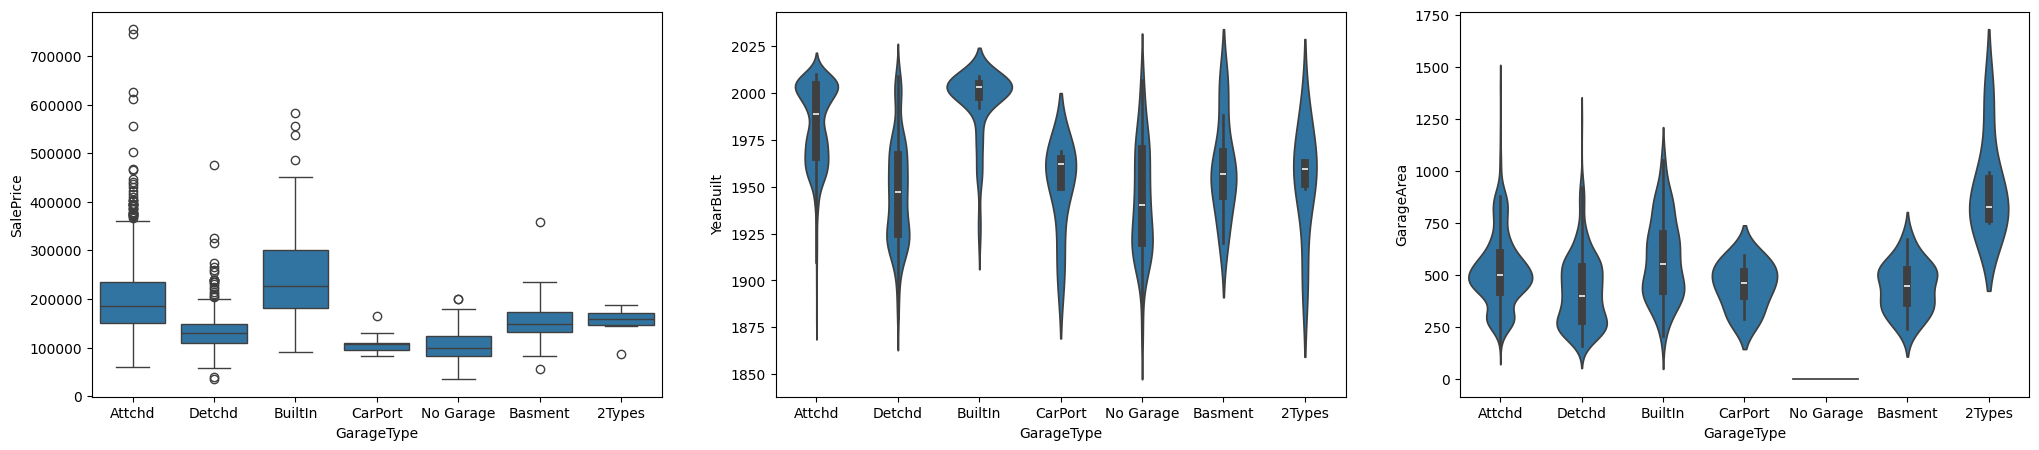

In [137]:
fig, axes = plt.subplots(1,3, figsize=(25, 5))

sns.boxplot(data=df, x="GarageType", y="SalePrice", ax=axes[0])
sns.violinplot(data=df, x="GarageType", y="YearBuilt", ax=axes[1])
sns.violinplot(data=df, x='GarageType', y='GarageArea', ax=axes[2])

In [138]:
print("\nYear Built by GarageType:")
print(df.groupby('GarageType')['YearBuilt'].mean().sort_values(ascending=False))


Year Built by GarageType:
GarageType
BuiltIn      1995.295455
Attchd       1983.009195
Basment      1959.842105
2Types       1953.166667
CarPort      1949.666667
Detchd       1946.777778
No Garage    1942.481481
Name: YearBuilt, dtype: float64


GarageType vs GarageCars relationship:
            mean   std  count
GarageType                   
2Types      3.00  0.63      6
Attchd      1.96  0.60    870
Basment     1.58  0.51     19
BuiltIn     2.25  0.61     88
CarPort     1.67  0.50      9
Detchd      1.58  0.58    387
No Garage   0.00  0.00     81


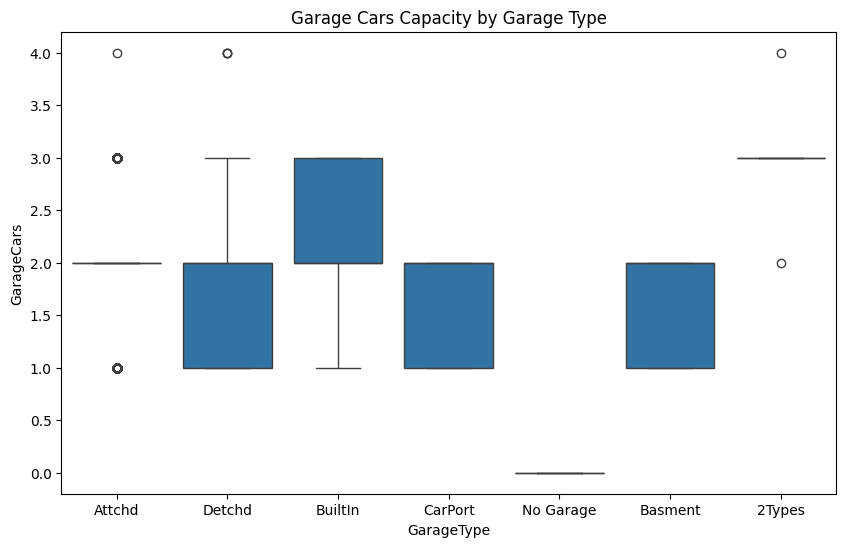

In [139]:

print("GarageType vs GarageCars relationship:")
print(df.groupby('GarageType')['GarageCars'].agg(['mean', 'std', 'count']).round(2))

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='GarageType', y='GarageCars')
plt.title('Garage Cars Capacity by Garage Type')

plt.show()

In [140]:
# Are 2Types clustered in certain areas?
print("\n2Types by Neighborhood (top 5):")
print(df[df['GarageType'] == '2Types']['Neighborhood'].value_counts().head())
# Might be rural/suburban areas with more land


2Types by Neighborhood (top 5):
Neighborhood
Mitchel    2
NAmes      1
OldTown    1
Crawfor    1
Timber     1
Name: count, dtype: int64


In [141]:
df["LotShape"].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

<Axes: xlabel='LotShape', ylabel='LotArea'>

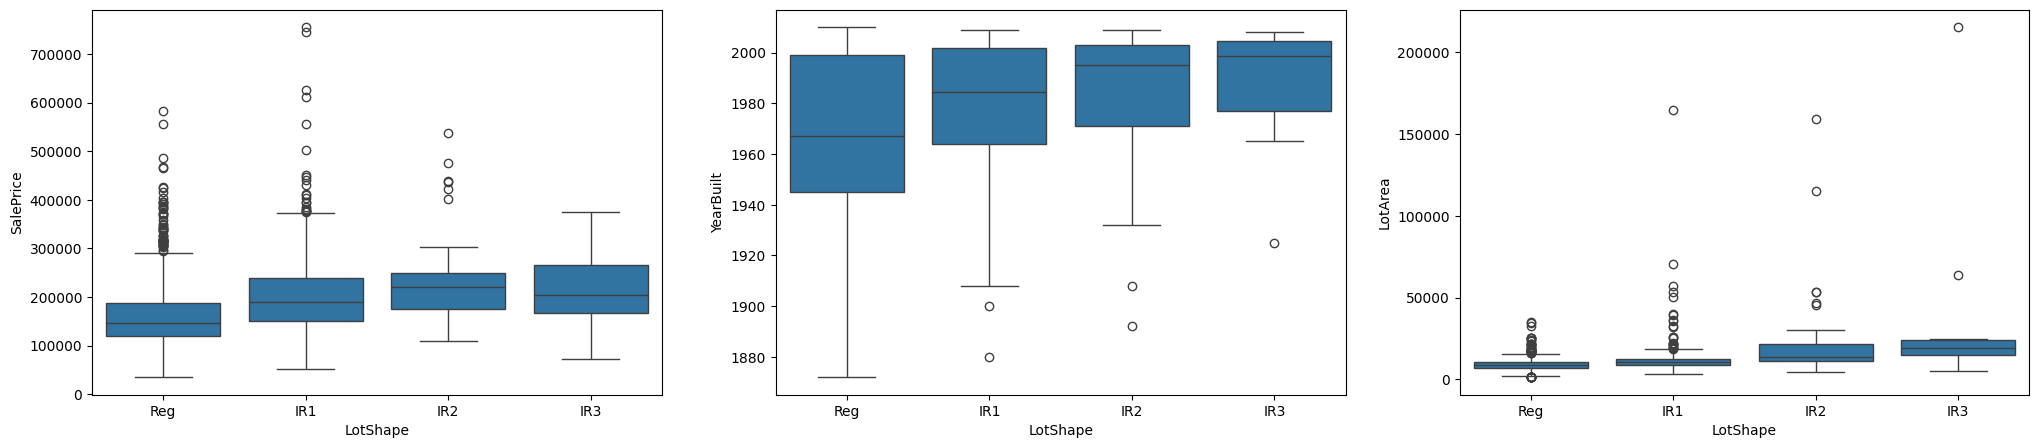

In [142]:
fig, axes = plt.subplots(1,3, figsize=(25, 5))

sns.boxplot(data=df, x="LotShape", y="SalePrice", ax=axes[0])
sns.boxplot(data=df, x="LotShape", y="YearBuilt", ax=axes[1])
sns.boxplot(data=df, x='LotShape', y='LotArea', ax=axes[2])

In [143]:
# Are irregular lots in certain neighborhoods?
print("Irregular lots by neighborhood:")
irregular_mask = df['LotShape'].isin(['IR1', 'IR2', 'IR3'])
print(df[irregular_mask]['Neighborhood'].value_counts().head(5))

Irregular lots by neighborhood:
Neighborhood
NAmes      68
CollgCr    64
Gilbert    64
NridgHt    34
Sawyer     32
Name: count, dtype: int64


In [144]:
# Do irregular lots have higher quality homes?
print("\nAverage quality by LotShape:")
print(df.groupby('LotShape')['OverallQual'].mean().sort_values(ascending=False))


Average quality by LotShape:
LotShape
IR3    6.800000
IR2    6.731707
IR1    6.431818
Reg    5.889730
Name: OverallQual, dtype: float64


In [145]:
df['Price_per_LotArea'] = df['SalePrice'] / df['LotArea']
print("\nPrice per Lot Area by LotShape:")
print(df.groupby('LotShape')['Price_per_LotArea'].mean().sort_values(ascending=False))


Price per Lot Area by LotShape:
LotShape
Reg    22.134221
IR1    19.638735
IR2    16.479469
IR3    10.706161
Name: Price_per_LotArea, dtype: float64


In [146]:
# Calculate density
df['House_to_Lot_Ratio'] = df['GrLivArea'] / df['LotArea']
metrics = df.groupby('LotShape').agg({
    'SalePrice': 'mean',
    'LotArea': 'mean',
    'GrLivArea': 'mean',
    'House_to_Lot_Ratio': 'mean',
    'OverallQual': 'mean',
    'Price_per_LotArea': 'mean'
}).round(2)

print(metrics.sort_values('LotArea', ascending=False))

          SalePrice   LotArea  GrLivArea  House_to_Lot_Ratio  OverallQual  \
LotShape                                                                    
IR3       216036.50  41338.20    2110.90                0.10         6.80   
IR2       239833.37  23733.66    1808.90                0.13         6.73   
IR1       206101.67  11894.55    1625.07                0.15         6.43   
Reg       164754.82   8876.92    1438.67                0.20         5.89   

          Price_per_LotArea  
LotShape                     
IR3                   10.71  
IR2                   16.48  
IR1                   19.64  
Reg                   22.13  


<Axes: xlabel='LandContour', ylabel='LotArea'>

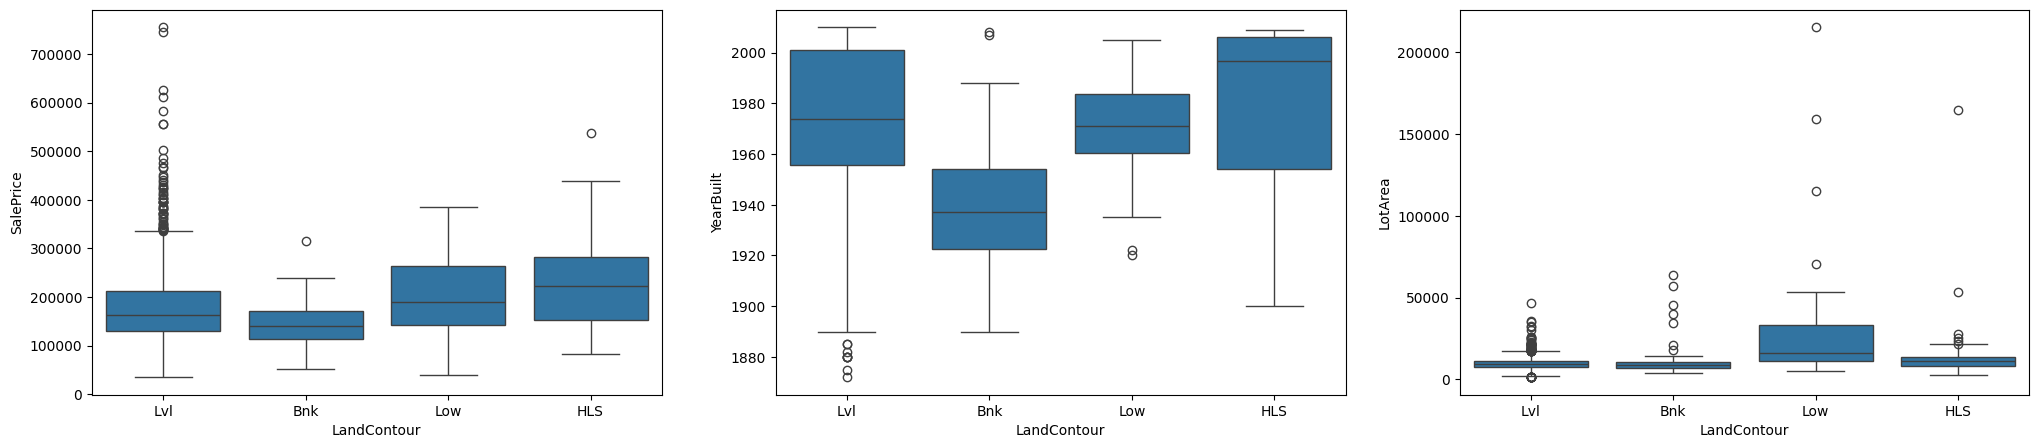

In [147]:
fig, axes = plt.subplots(1,3, figsize=(25, 5))

sns.boxplot(data=df, x="LandContour", y="SalePrice", ax=axes[0])
sns.boxplot(data=df, x="LandContour", y="YearBuilt", ax=axes[1])
sns.boxplot(data=df, x='LandContour', y='LotArea', ax=axes[2])

In [148]:
df["LandContour"].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [149]:
df["SaleCondition"].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

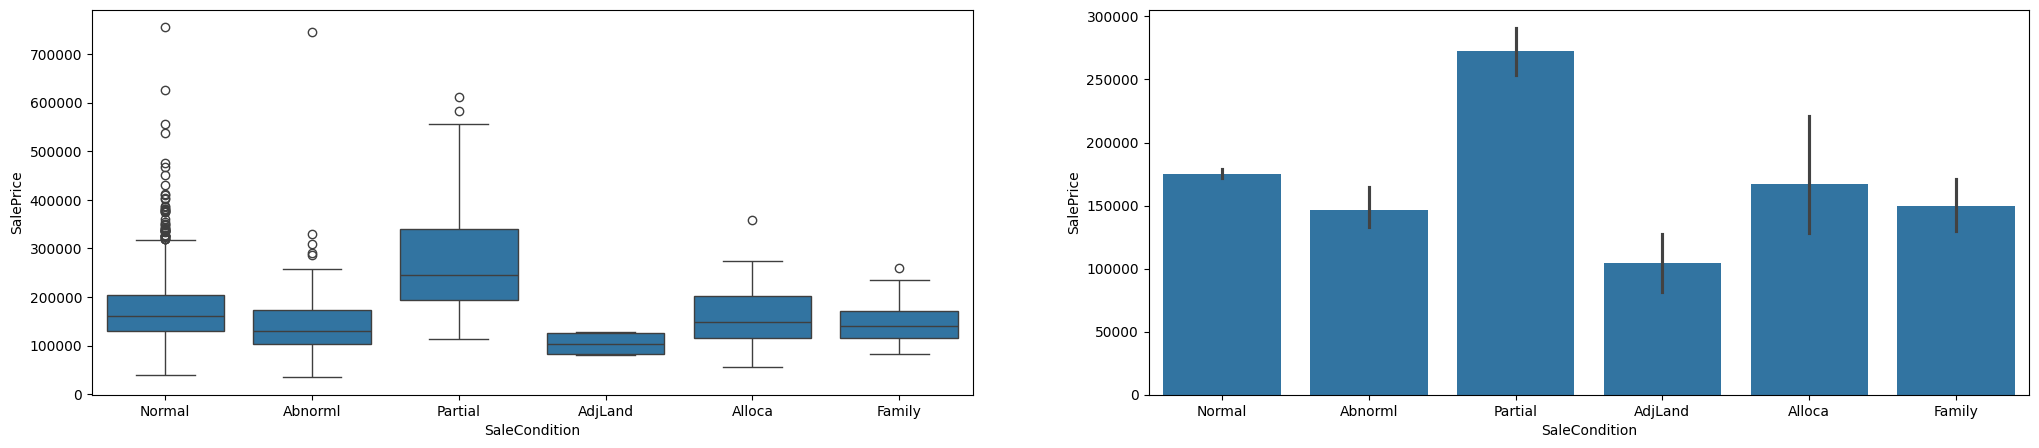

In [150]:
fig, axes = plt.subplots(1,2, figsize=(25, 5))

sns.boxplot(data=df, x="SaleCondition", y="SalePrice", ax=axes[0])
sns.barplot(data=df, x="SaleCondition", y="SalePrice", ax=axes[1])

In [151]:
print(df.groupby('SaleCondition')['SalePrice'].agg(['mean', 'median', 'count']))

                        mean    median  count
SaleCondition                                
Abnorml        146526.623762  130000.0    101
AdjLand        104125.000000  104000.0      4
Alloca         167377.416667  148145.0     12
Family         149600.000000  140500.0     20
Normal         175202.219533  160000.0   1198
Partial        272291.752000  244600.0    125


<Axes: xlabel='SaleType', ylabel='SalePrice'>

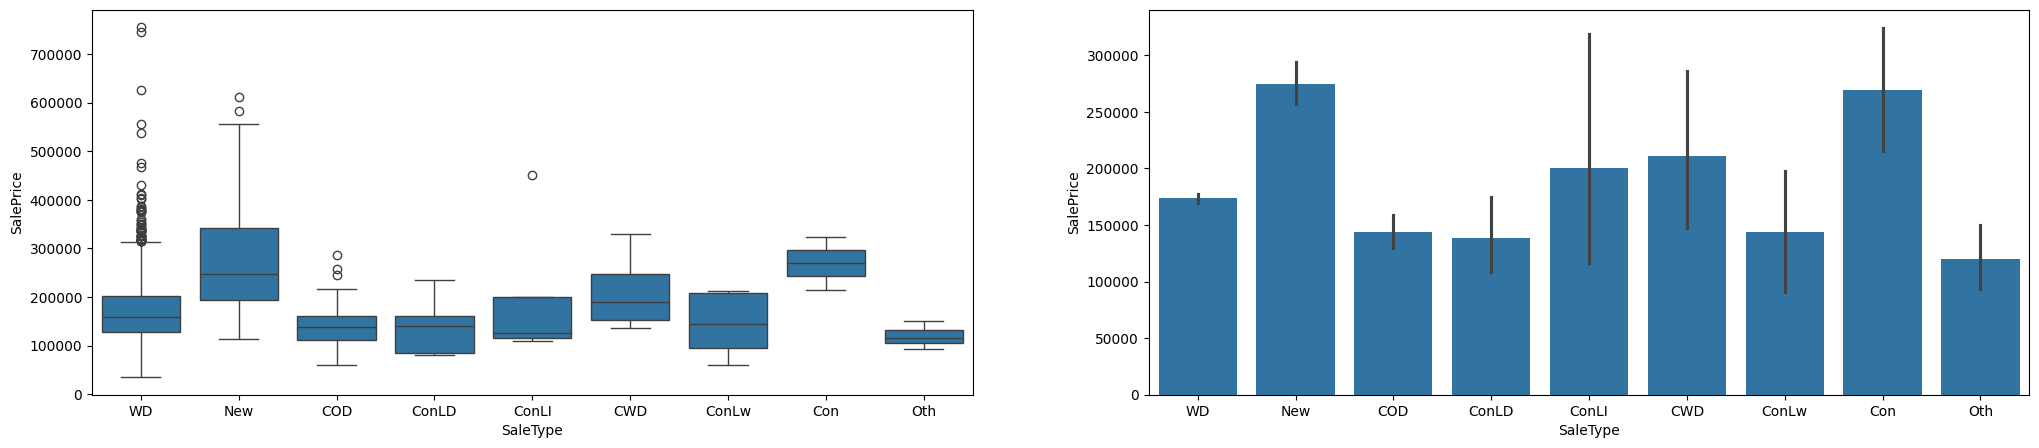

In [152]:
fig, axes = plt.subplots(1,2, figsize=(25, 5))

sns.boxplot(data=df, x="SaleType", y="SalePrice", ax=axes[0])
sns.barplot(data=df, x="SaleType", y="SalePrice", ax=axes[1])

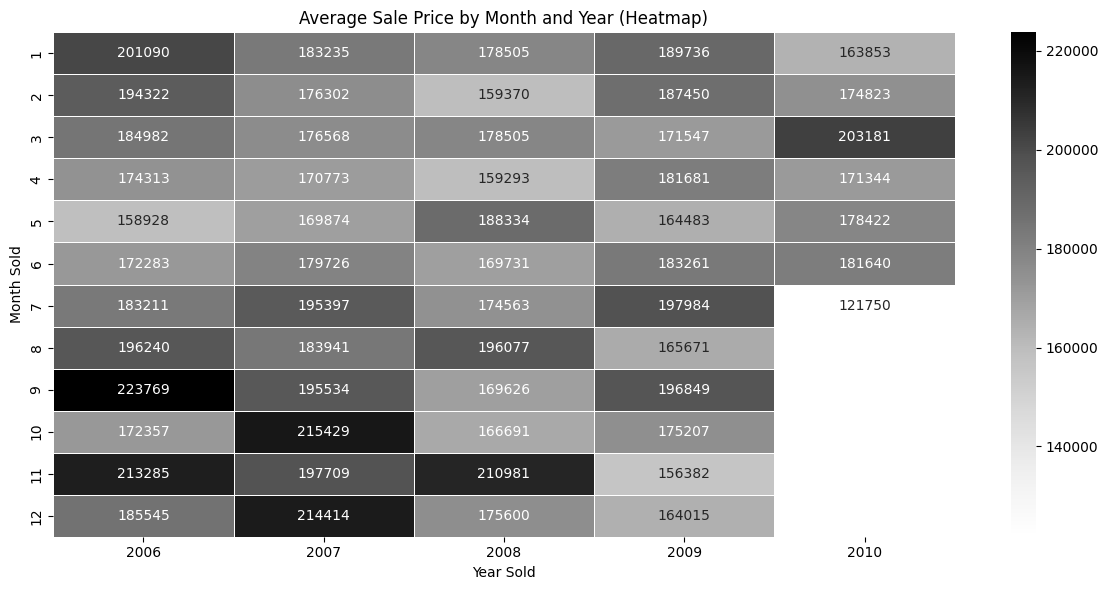

In [205]:
# Create pivot table
pivot = df.pivot_table(values='SalePrice', index='MoSold', columns='YrSold', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Greys', linewidths=0.5)
plt.title('Average Sale Price by Month and Year (Heatmap)')
plt.xlabel('Year Sold')
plt.ylabel('Month Sold')
plt.tight_layout()
plt.show()

# Putting it all together

In [199]:
features_list = ['OverallQual', '2ndFlrSF', 'BsmtUnfSF', '1stFlrSF', 'TotalBsmtSF', 'GarageCars', 'LotArea', 'BsmtHeight', 'GrLivArea', 'TotRmsAbvGrd']

new_features = df[['OverallQual', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'TotalBsmtSF', 'GarageCars', 'LotArea']].copy()

bsmt_height_map = {
    "ex": 100,
    "gd": 95,
    "ta": 85,
    "fa": 75,
    "po": 65,
    "no basement": 55
}

new_features["BsmtHeight"] = df["BsmtQual"].str.lower().map(bsmt_height_map)


In [200]:
new_features["is_single_fam_detatched"] = (df["BldgType"] == "1Fam").astype(int)
new_features["PorchArea"] = ((df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]))
new_features["hasPorch"] = ((df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]) > 0).astype(int)
new_features["WoodDeckSF"] = df["WoodDeckSF"].copy()
new_features["is_residential"] = df["MSZoning"].isin(["RL", "RH", "RP", "RM"]).astype(int)
new_features["LotFrontage"] = df["LotFrontage"].copy()
new_features["OverallCond"] = df["OverallCond"].copy()

new_features["TotalBathrooms"] = (df["FullBath"] + 0.5*df["HalfBath"] + 
                                   df["BsmtFullBath"] + 0.5*df["BsmtHalfBath"])

new_features["Fireplaces"] = df["Fireplaces"].copy()
new_features["GarageArea"] = df["GarageArea"].copy()

new_features["HouseAge"] = df['YrSold'] - df['YearBuilt']

df['Era'] = pd.cut(df['YearBuilt'],
                   bins=[1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020],
                   labels=['1880s', '1900s', '1920s', '1940s', '1960s', '1980s', '2000s+'])
# Foundation × Era interactions
new_features['PConc_in_Early_Era'] = ((df['Foundation'] == 'PConc') & 
                           (df['Era'].isin(['1880s', '1900s', '1920s']))).astype(int)

new_features['PConc_in_Modern_Era'] = ((df['Foundation'] == 'PConc') & 
                            (df['Era'].isin(['1980s', '2000s+']))).astype(int)
new_features['LotShape'] = df['LotShape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})


In [201]:
new_features.columns

Index(['OverallQual', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'TotalBsmtSF',
       'GarageCars', 'LotArea', 'BsmtHeight', 'is_single_fam_detatched',
       'PorchArea', 'hasPorch', 'WoodDeckSF', 'is_residential', 'LotFrontage',
       'OverallCond', 'YrSold', 'TotalBathrooms', 'Fireplaces', 'GarageArea',
       'HouseAge', 'PConc_in_Early_Era', 'PConc_in_Modern_Era', 'LotShape'],
      dtype='object')

In [202]:
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Combine all features
X_full = new_features.copy()
X_full["Neighborhood"] = df["Neighborhood"].copy()
y = df["SalePrice"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

neighborhood_train = df.loc[X_train.index, 'Neighborhood']
neighborhood_test = df.loc[X_test.index, 'Neighborhood']

# Calculate neighborhood average price 
neighborhood_avg_price = pd.DataFrame({
    'Neighborhood': neighborhood_train,
    'SalePrice': y_train
}).groupby('Neighborhood')['SalePrice'].mean()

# Apply to both train and test
X_train['Neighborhood'] = neighborhood_train.map(neighborhood_avg_price)
X_test['Neighborhood'] = neighborhood_test.map(neighborhood_avg_price)

# Handle any neighborhoods in test that weren't in train (use global mean)
global_mean = y_train.mean()
X_train['Neighborhood'] = X_train['Neighborhood'].fillna(global_mean)
X_test['Neighborhood'] = X_test['Neighborhood'].fillna(global_mean)


xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    enable_categorical=False  
)


# Train the model
X_train_array = X_train.values.astype(float)
X_test_array = X_test.values.astype(float)

xgb_model.fit(X_train_array, y_train.values.astype(float), verbose=False)
prediction = xgb_model.predict(X_test_array)
r2 = r2_score(y_test.values.astype(float), prediction)
print(f"R_squared Score: ): {r2:.3f}")



R_squared Score: ): 0.920


In [203]:
from catboost import CatBoostRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Combine all features
X_full = new_features.copy()
X_full["Neighborhood"] = df["Neighborhood"].copy()
y = df["SalePrice"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

neighborhood_train = df.loc[X_train.index, 'Neighborhood']
neighborhood_test = df.loc[X_test.index, 'Neighborhood']

# Calculate neighborhood average price 
neighborhood_avg_price = pd.DataFrame({
    'Neighborhood': neighborhood_train,
    'SalePrice': y_train
}).groupby('Neighborhood')['SalePrice'].mean()

# Apply to both train and test
X_train['Neighborhood'] = neighborhood_train.map(neighborhood_avg_price)
X_test['Neighborhood'] = neighborhood_test.map(neighborhood_avg_price)

# Handle any neighborhoods in test that weren't in train (use global mean)
global_mean = y_train.mean()
X_train['Neighborhood'] = X_train['Neighborhood'].fillna(global_mean)
X_test['Neighborhood'] = X_test['Neighborhood'].fillna(global_mean)

catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=4,
    subsample=0.8,
    colsample_bylevel=0.8,
    loss_function='RMSE',
    random_state=42,
    verbose=False
)

# Train the model
X_train_array = X_train.values.astype(float)
X_test_array = X_test.values.astype(float)

catboost_model.fit(X_train_array, y_train.values.astype(float))

prediction = catboost_model.predict(X_test_array)
r2 = r2_score(y_test.values.astype(float), prediction)
print(f"R_squared Score: {r2:.3f}")

R_squared Score: 0.917


In [228]:
def clean_df(df):
    #For lot frontage, fill null with 0 ----------
    df["LotFrontage"] = df["LotFrontage"].fillna(0)
    
    #For alley, fill null with "None" --------------------
    df["Alley"] = df["Alley"].fillna("None")
    
    #For MasVnrType, fill null with "None" --------------------
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    
    #For MasVnrArea, fill null with 0 --------------------
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0.0)
    
    #For BsmtQual, fill null with "No Basement" --------------------
    df["BsmtQual"] = df["BsmtQual"].fillna("No Basement")
    
    #For BsmtCond, fill null with "No Basement" --------------------
    df["BsmtCond"] = df["BsmtCond"].fillna("No Basement")
    
    #For BsmtExposure, fill null with "No Basement" --------------------
    df["BsmtExposure"] = df["BsmtExposure"].fillna("No Basement")
    
    #For BsmtFinType1, fill null with "No Basement" --------------------
    df["BsmtFinType1"] = df["BsmtFinType1"].fillna("No Basement")
    
    #For BsmtFinType2, fill null with "No Basement" --------------------
    df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No Basement")
    
    #For FireplaceQu, fill null with "No Fireplace" --------------------
    df["FireplaceQu"] = df["FireplaceQu"].fillna("No Fireplace")
    
    #For GaragType, fill null with "No Garage" --------------------
    df["GarageType"] = df["GarageType"].fillna("No Garage")
    
    #For GarageYrBlt, fill null with 0 --------------------
    df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
    
    #For GarageFinish, fill null with "No Garage" --------------------
    df["GarageFinish"] = df["GarageFinish"].fillna("No Garage")
    
    #For GarageQual, fill null with "No Garage" --------------------
    df["GarageQual"] = df["GarageQual"].fillna("No Garage")
    
    #For GarageCond, fill null with "No Garage" --------------------
    df["GarageCond"] = df["GarageCond"].fillna("No Garage")
    
    #For PoolQC, fill null with "No Pool" --------------------
    df["PoolQC"] = df["PoolQC"].fillna("No Pool")
    
    #For Fence, fill null with "No Fence" --------------------
    df["Fence"] = df["Fence"].fillna("No Fence")
    
    #For MiscFeature, fill null with "None" --------------------
    df["MiscFeature"] = df["MiscFeature"].fillna("None")
    
    #For Electrical, fill null with "no electricity" -----
    df["Electrical"] = df["Electrical"].fillna("None")

    return df

In [235]:
def get_transformed_df(df):
    basement_df = df[basement_features].copy()
    
    basement_df["HasBasement"] = (basement_df["BsmtQual"].str.lower() != "no basement").astype(int)
    basement_df["BsmtCond"] = basement_df["BsmtCond"].copy().str.lower().map({"no basement": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
    basement_df["BsmtExposure"] = basement_df["BsmtExposure"].copy().str.lower().map({"no basement": 0, "no": 1, "mn": 2, "av": 3, "gd":4})
    basement_df["BsmtFinType1"] = basement_df["BsmtFinType1"].copy().str.lower().map({"no basement": 0, "unf": 1, "lwq": 2, "rec": 3, "blq":4, "alq": 5, "glq":6})
    basement_df["BsmtFinType2"] = basement_df["BsmtFinType2"].copy().str.lower().map({"no basement": 0, "unf": 1, "lwq": 2, "rec": 3, "blq":4,"alq": 5, "glq": 5})
    
    bsmt_height_map = {
        "ex": 100,
        "gd": 95,
        "ta": 85,
        "fa": 75,
        "po": 65,
        "no basement": 55
    }
    
    basement_df["BsmtHeight"] = df["BsmtQual"].str.lower().map(bsmt_height_map)
    
    basement_df = basement_df.drop(["BsmtQual"], axis=1)
    exterior_df = df[exterior_features].copy()
    
    exterior_df["RoofMatStyleConcat"] = exterior_df["RoofMatl"] + " " + exterior_df["RoofStyle"]
    exterior_df['YearBuilt_decade'] = (df['YearBuilt'] // 10) * 10
    
    print(exterior_df["RoofMatStyleConcat"].value_counts(normalize=True).sort_values(ascending=False) * 100)
    
    exterior_df["isRareRoof"] = (exterior_df["RoofMatl"] != "CompShg").astype(int)
    
    exterior_df["ExterQual"] = df["ExterQual"].str.lower().map({"po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
    exterior_df["ExterCond"] = df["ExterCond"].str.lower().map({"po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
    exterior_df["HasVeeneer"] = (df["MasVnrArea"] > 0).astype(int)
    
    bins = [-1, 0, 200, 500, 1000, float('inf')]
    labels = ['0', '1-200', '200-500', '500-1000', '1000+']
    
    df['MasVnrArea_binned'] = pd.cut(df['MasVnrArea'],
                                      bins=bins,
                                      labels=labels,
                                      right=False)  # right=False makes intervals [left, right)
    
    bin_ordinal_map = {0: 0, '1-200': 1, '200-500': 2, '500-1000': 3, '1000+': 4}
    exterior_df['MasVnrArea'] = df['MasVnrArea_binned'].map(bin_ordinal_map)
    
    exterior_df["ExterOverall"] = exterior_df["ExterQual"] * exterior_df["ExterCond"]
    
    # 1. Define durability map (domain judgment)
    durability_map = {
        'Stone': 1.0,      # Most durable, permanent
        'BrkFace': 0.9,    # Brick veneer, very durable
        'BrkComm': 0.9,    # Common brick, very durable
        'CBlock': 0.85,    # Concrete block, very durable
        'CemntBd': 0.8,    # Cement board, durable
        'Stucco': 0.75,    # Durable if maintained
        'ImStucc': 0.7,    # Imitation stucco, less durable
        'MetalSd': 0.65,   # Metal siding, durable but dents
        'VinylSd': 0.6,    # Vinyl siding, moderate durability
        'HdBoard': 0.55,   # Hardboard, moderate
        'Plywood': 0.5,    # Plywood siding, moderate
        'Wd Sdng': 0.45,   # Wood siding, requires maintenance
        'WdShing': 0.4,    # Wood shingles, higher maintenance
        'AsbShng': 0.3,    # Asbestos shingles (hazardous, brittle)
        'AsphShn': 0.2     # Asphalt shingles (roof material, degrades)
    }
    
    # 2. Create the key feature
    exterior_df['exterior_1_age_score'] = (df["YrSold"] - df['YearBuilt']) / df['Exterior1st'].map(durability_map)
    exterior_df['exterior_2_age_score'] = (df["YrSold"] - df['YearBuilt']) / df['Exterior2nd'].map(durability_map)
    
    # 3. Use it. This one engineered feature may capture more signal than all three original columns combined.
    
    exterior_df = exterior_df.drop(["Exterior1st", "Exterior2nd", "MasVnrType", "RoofStyle", "RoofMatl", "RoofMatStyleConcat", "YearBuilt_decade"],axis=1)
    exterior_df[["exterior_1_age_score", "exterior_2_age_score"]] = exterior_df[["exterior_1_age_score", "exterior_2_age_score"]].fillna(0)
    garage_df = df[garage_features].copy()
    
    
    
    garage_df["HasGarage"] = (df["GarageType"].str.lower() != "no garage").astype(int)
    garage_df["GarageQual"] = garage_df["GarageQual"].str.lower().map({"no garage": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
    garage_df["GarageCond"] = garage_df["GarageCond"].str.lower().map({"no garage": 0, "po": 1, "fa": 2, "ta": 3, "gd":4, "ex": 5})
    
    garage_df["is_detatched_garage"] = (garage_df["GarageType"] == "Detchd").astype(int)
    garage_df["is_builtin_garage"] = (garage_df["GarageType"] == "BuiltIn").astype(int)
    garage_df['is_carport_or_basement_garage'] = (garage_df['GarageType'].isin(['CarPort', 'Basment'])).astype(int)
    
    garage_df["quality_cond_gap"] = garage_df["GarageQual"] - garage_df["GarageCond"]
    
    garage_df["GarageFinish"] = df["GarageFinish"].map({'RFn': 2, 'Unf': 1, 'Fin': 3, 'No Garage': 0})
    garage_df = garage_df.drop(["GarageType", "GarageYrBlt"], axis=1)
    #Very hard to see any real pattern as 'Typical' dominates the feature so, I will just flag non-typical functionality
   
    interior_df = df[interior_features]
    
    interior_df['has_functional_issues'] = (interior_df['Functional'] != 'Typ').astype(int)
    
    interior_df['KitchenQual'] = interior_df['KitchenQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
    interior_df["NumOfFirePlace"] = (interior_df["Fireplaces"] > 0).astype(int)
    interior_df['FireplaceQu'] = interior_df['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Fireplace': 0})
    
    interior_df['bedroom_ratio'] = interior_df['BedroomAbvGr'] / (interior_df['TotRmsAbvGrd'] + 1)
    interior_df['bedroom-bathroom_ratio'] = (interior_df['FullBath'] + interior_df["HalfBath"]) / (df['BedroomAbvGr']).replace(0,1)
    # Total full & half baths
    interior_df['TotalFullBath'] = interior_df['FullBath'] + interior_df['BsmtFullBath']
    interior_df['TotalHalfBath'] = interior_df['HalfBath'] + interior_df['BsmtHalfBath']

    interior_df = interior_df.drop(["Functional"], axis=1)
    structure_df = df[structure_features].copy()
    
    ms_subclass_map = {
        20: '1-STORY 1946 & NEWER',
        30: '1-STORY 1945 & OLDER', 
        40: '1-STORY W/FINISHED ATTIC',
        45: '1-1/2 STORY UNFINISHED',
        50: '1-1/2 STORY FINISHED',
        60: '2-STORY 1946 & NEWER',
        70: '2-STORY 1945 & OLDER',
        75: '2-1/2 STORY',
        80: 'SPLIT OR MULTI-LEVEL',
        85: 'SPLIT FOYER',
        90: 'DUPLEX',
        120: '1-STORY PUD',
        150: '1-1/2 STORY PUD',
        160: '2-STORY PUD',
        180: 'PUD MULTILEVEL',
        190: '2 FAMILY CONVERSION'
    }
    
    structure_df['MSSubClass_Text'] = structure_df['MSSubClass'].map(ms_subclass_map)
    
    structure_df["has_storage_story"] = structure_df["MSSubClass"].isin([40,45,50,75,150]).astype(int)
    
    
    structure_df['is_PConc'] = (structure_df['Foundation'] == 'PConc').astype(int)
    structure_df['is_CBlock'] = (structure_df['Foundation'] == 'CBlock').astype(int)
    structure_df['is_OtherFoundation'] = (~structure_df['Foundation'].isin(['PConc', 'CBlock'])).astype(int)
    
    structure_df["remodelAge"] = df["YrSold"] - df["YearRemodAdd"]
    
    structure_df["newly_remodelled"] = ((df["YrSold"] - df["YearRemodAdd"]) <= 5).astype(int)
    
    structure_df["HouseAge"] =  df["YrSold"]- df["YearBuilt"]
    
    structure_df = structure_df.drop(["BldgType", "HouseStyle", "MSSubClass_Text", "MSSubClass", "Foundation", "YearBuilt", "YearRemodAdd", "newly_remodelled"], axis=1)
    
    utility_df = df[utility_features].copy()
    
    utility_df = utility_df.drop(["Heating", "HeatingQC", "Electrical", "CentralAir", "Electrical", "Utilities"], axis=1)
    
    site_df = df[site_features].copy()
    
    # Irregular lot (premium or problematic?)
    
    site_df['isRegularLot'] = (df['LotShape'] == 'Reg').astype(int)
    site_df['isIrregularLotType1'] = (df['LotShape'] == 'IR1').astype(int)
    
    # Cul-de-sac premium
    site_df['CulDeSac'] = (df['LotConfig'] == 'CulDSac').astype(int)
    
    # Non-level lot (construction challenges)
    site_df['SlopedLot'] = df['LandContour'].isin(['Bnk', 'HLS', 'Low']).astype(int)
    
    # Steep slope 
    site_df['SteepSlope'] = (df['LandSlope'] != 'Gtl').astype(int)
    
    # Has alley access 
    site_df['HasAlley'] = (df['Alley'] != 'None').astype(int)
    
    # Partial or no pavement (cheap)
    site_df['PoorPavement'] = (df['PavedDrive'] != 'Y').astype(int)
    
    # Dirt road (rural/cheap)
    site_df['DirtRoad'] = (df['Street'] == 'Grvl').astype(int)
    
    
    site_df = site_df.drop(["LotShape", "LotConfig", "LandSlope","LandContour", "Street", "Alley", "PavedDrive"],axis=1)
    
    dimension_df = df[dimension_features].copy()
    dimension_df["basement_majority_unfinished"] =(dimension_df["BsmtUnfSF"] > (dimension_df["BsmtFinSF1"] + dimension_df["BsmtFinSF2"]) ).astype(int)
    
    dimension_df = dimension_df.drop(["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "PoolArea", "3SsnPorch", "ScreenPorch", "LowQualFinSF"], axis=1)
    
    final_df = pd.concat([basement_df,exterior_df, garage_df, interior_df, structure_df, site_df, dimension_df], axis=1)

    unique_features = list(set(final_df.columns.tolist()))
    final_df = final_df[unique_features]

    return final_df

In [236]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

X_train = get_transformed_df(train_df)
X_test = get_transformed_df(test_df)
y_train = train_df["SalePrice"].copy()


X_train["Neighborhood"] = train_df["Neighborhood"].copy()


neighborhood_train = df.loc[X_train.index, 'Neighborhood']
neighborhood_test = df.loc[X_test.index, 'Neighborhood']

# Calculate neighborhood average price 
neighborhood_avg_price = pd.DataFrame({
    'Neighborhood': neighborhood_train,
    'SalePrice': y_train
}).groupby('Neighborhood')['SalePrice'].mean()

# Apply to both train and test
X_train['Neighborhood'] = neighborhood_train.map(neighborhood_avg_price)
X_test['Neighborhood'] = neighborhood_test.map(neighborhood_avg_price)

# Handle any neighborhoods in test that weren't in train (use global mean)
global_mean = y_train.mean()
X_train['Neighborhood'] = X_train['Neighborhood'].fillna(global_mean)
X_test['Neighborhood'] = X_test['Neighborhood'].fillna(global_mean)

RoofMatStyleConcat
CompShg Gable      77.671233
CompShg Hip        19.315068
CompShg Gambrel     0.753425
Tar&Grv Flat        0.684932
WdShngl Gable       0.342466
CompShg Mansard     0.342466
WdShake Hip         0.136986
WdShake Mansard     0.136986
Membran Flat        0.068493
Metal Flat          0.068493
CompShg Flat        0.068493
Tar&Grv Gable       0.068493
WdShngl Hip         0.068493
CompShg Shed        0.068493
WdShake Shed        0.068493
Roll Gable          0.068493
ClyTile Hip         0.068493
Name: proportion, dtype: float64
RoofMatStyleConcat
CompShg Gable      79.780672
CompShg Hip        17.957505
CompShg Gambrel     0.753941
Tar&Grv Flat        0.479781
Tar&Grv Gable       0.342700
CompShg Mansard     0.205620
WdShake Hip         0.205620
CompShg Shed        0.137080
WdShake Mansard     0.068540
WdShngl Shed        0.068540
Name: proportion, dtype: float64


C:\Users\Straw\AppData\Local\Temp\ipykernel_37452\1399700391.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interior_df['has_functional_issues'] = (interior_df['Functional'] != 'Typ').astype(int)
C:\Users\Straw\AppData\Local\Temp\ipykernel_37452\1399700391.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interior_df['KitchenQual'] = interior_df['KitchenQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
C:\Users\Straw\AppData\Local\Temp\ipykernel_37452\1399700391.py:98: SettingWithCopyWarning: 
A

In [237]:
X_train.shape

(1460, 74)

In [238]:
X_test.shape

(1459, 74)

In [239]:
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    enable_categorical=False  
)


# Train the model
X_train_array = X_train.values.astype(float)
X_test_array = X_test.values.astype(float)

xgb_model.fit(X_train_array, y_train.values.astype(float), verbose=False)
prediction = xgb_model.predict(X_test_array)



In [240]:
prediction

array([129865.31, 172682.22, 189820.23, ..., 178804.75, 134369.55,
       204050.92], dtype=float32)

In [241]:
output = pd.DataFrame({"Id": test_df["Id"].tolist(), "SalePrice": prediction})

In [242]:
output.to_csv("submission2.csv", index=False)